# Telecom Churn - ML Group case study

## Problem statement:

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
In this project, customer-level data of a leading telecom firm is analysed for building predictive models for identifying customers at high risk of churn and also to identify the main indicators of churn.

### Business Objective

The dataset provided for Indian and Southeast Asian market contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


##### The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Some Important points for Churn

In the postpaid model, anticipating churn instance from customers is easy as when customers want to switch to another operator, they usually inform the existing operator to terminate the services.
    However, in the prepaid model, predicting churn is usually more critical (and non-trivial). In this case customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily. Prepaid is the most common model in India and southeast Asia
    
-- Broadly churn can be defined in two ways:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.
    
**Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In this study this type of churn will be used.**

-- High-value Churn:

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, reducing churn of the high-value customers, will reduce significant revenue leakage. 
**In this study churn will be predicted only on high-value customers.**

-- Customer Behaviour During Churn:

In churn prediction, we assume that there are three phases of customer (especifically for high-value customer) lifecycle:

1 The ‘good’ phase - Here the customer is happy with the service and behaves as usual.

2 The ‘action’ phase - The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. 
**In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)**

3 The ‘churn’ phase - In this phase, the customer is said to have churned. Here churn will be defined  based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available for prediction. Thus, after tagging churn as 1/0 based on this phase,all data corresponding to this phase to be discarded.
    
**In this case, since this study is being done over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.**

In [1]:
#Impoting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

## Reading the Dataset

In [2]:
df = pd.read_csv(r"E:\Rajeev\IIITB\ML&AI\Machine_Learning_2\Group_Case_Study\telecom_churn_data.csv", encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
# Cheking shape of data
df.shape

(99999, 226)

In [4]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## Finding High Value Customers

Total Data Recharge amount will be: Number of data recharges * Average recharge amount

In [5]:
df['total_data_rech_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']

df['total_data_rech_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

Total recharge amount for June and July will be: Total Data Recharge amount + Total Call Recharge Amount

In [6]:
df['gt_rech_amt_6'] = df[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)

df['gt_rech_amt_7'] = df[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)

In [7]:
# column 'gt_rech_amt_6' is the sum of columns 'total_data_rech_amt_6' and 'total_rech_amt_6'. 
# In case 'total_data_rech_amt_6' is blank, then column 'gt_rech_amt_6' is same as 'total_rech_amt_6' 

df[['total_data_rech_amt_6', 'total_rech_amt_6', 'gt_rech_amt_6']].head(5)

total_data_rech_amt_6  total_rech_amt_6  gt_rech_amt_6
0                  252.0               362          614.0
1                    NaN                74           74.0
2                    NaN               168          168.0
3                    NaN               230          230.0
4                   56.0               196          252.0

In [8]:
df[['total_data_rech_amt_7', 'total_rech_amt_7', 'gt_rech_amt_7']].head(5)

total_data_rech_amt_7  total_rech_amt_7  gt_rech_amt_7
0                  252.0               252          504.0
1                  154.0               384          538.0
2                    NaN               315          315.0
3                    NaN               310          310.0
4                    NaN               350          350.0

Average recharge amount for June and July

In [9]:
df['av_rech_amt_6_7'] = df[['gt_rech_amt_6','gt_rech_amt_7']].mean(axis=1)

In [10]:
df[['av_rech_amt_6_7']].head(5)

av_rech_amt_6_7
0            559.0
1            306.0
2            241.5
3            270.0
4            301.0

### We will retain only those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months 

In [11]:
df = df[(df['av_rech_amt_6_7']>= df['av_rech_amt_6_7'].quantile(0.7))]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 231 entries, mobile_number to av_rech_amt_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.1+ MB


## Identifying Churn based on the condition that users who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once, will Churn

In [13]:
df['churn'] = np.where(((df['total_ic_mou_9'] == 0.00) & (df['total_og_mou_9'] == 0.00)
                       & (df['vol_2g_mb_9'] == 0.00) & (df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

In [14]:
print(df['churn'].value_counts())

0    27560
1     2441
Name: churn, dtype: int64


In [15]:
df['churn'].dtypes

dtype('int32')

In [16]:
df[['churn']].head(5)

churn
0       1
7       1
8       0
21      0
23      0

In [17]:
df['churn'].dtypes

dtype('int32')

### Getting all the coloumns for September month, as they need to be removed

In [18]:
feature_sep=df.filter(regex='_9|sep', axis = 1)

In [19]:
print(feature_sep.columns)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [20]:
print(len(feature_sep.columns))

55


In [21]:
df.shape

(30001, 232)

In [22]:
df = df.drop(feature_sep, axis=1)

In [23]:
df.shape

(30001, 177)

## Data Preparation

### Identifying features with unique or single values as they will not bring any significance.

In [24]:
unique_value = pd.DataFrame(df.nunique())

In [25]:
unique_value

0
mobile_number             30001
circle_id                     1
loc_og_t2o_mou                1
std_og_t2o_mou                1
loc_ic_t2o_mou                1
last_date_of_month_6          1
last_date_of_month_7          1
last_date_of_month_8          1
arpu_6                    29072
arpu_7                    29084
arpu_8                    28073
onnet_mou_6               16890
onnet_mou_7               16987
onnet_mou_8               15872
offnet_mou_6              21220
offnet_mou_7              21263
offnet_mou_8              20163
roam_ic_mou_6              4048
roam_ic_mou_7              3385
roam_ic_mou_8              3433
roam_og_mou_6              4744
roam_og_mou_7              3994
roam_og_mou_8              4001
loc_og_t2t_mou_6          10420
loc_og_t2t_mou_7          10394
loc_og_t2t_mou_8          10063
loc_og_t2m_mou_6          15625
loc_og_t2m_mou_7          15674
loc_og_t2m_mou_8          15130
loc_og_t2f_mou_6           3090
loc_og_t2f_mou_7           3100
loc_og_t2f_mou_8           2989
loc_og_t2c_mou_6           1682
loc_og_t2c_mou_7           1764
loc_og_t2c_mou_8           1723
loc_og_mou_6              18348
loc_og_mou_7              18502
loc_og_mou_8              17582
std_og_t2t_mou_6          11102
std_og_t2t_mou_7          11254
std_og_t2t_mou_8          10251
std_og_t2m_mou_6          12875
std_og_t2m_mou_7          12888
std_og_t2m_mou_8          11803
std_og_t2f_mou_6           1656
std_og_t2f_mou_7           1599
std_og_t2f_mou_8           1518
std_og_t2c_mou_6              1
std_og_t2c_mou_7              1
std_og_t2c_mou_8              1
std_og_mou_6              15922
std_og_mou_7              15958
std_og_mou_8              14719
isd_og_mou_6               1031
isd_og_mou_7               1035
isd_og_mou_8                886
spl_og_mou_6               3050
spl_og_mou_7               3317
spl_og_mou_8               3193
og_others_6                 841
og_others_7                 116
og_others_8                 131
total_og_mou_6            23519
total_og_mou_7            23684
total_og_mou_8            22316
loc_ic_t2t_mou_6           9506
loc_ic_t2t_mou_7           9658
loc_ic_t2t_mou_8           9363
loc_ic_t2m_mou_6          15461
loc_ic_t2m_mou_7          15547
loc_ic_t2m_mou_8          15122
loc_ic_t2f_mou_6           4752
loc_ic_t2f_mou_7           4818
loc_ic_t2f_mou_8           4655
loc_ic_mou_6              18524
loc_ic_mou_7              18496
loc_ic_mou_8              18069
std_ic_t2t_mou_6           4400
std_ic_t2t_mou_7           4471
std_ic_t2t_mou_8           4264
std_ic_t2m_mou_6           6356
std_ic_t2m_mou_7           6455
std_ic_t2m_mou_8           6117
std_ic_t2f_mou_6           1959
std_ic_t2f_mou_7           2019
std_ic_t2f_mou_8           1891
std_ic_t2o_mou_6              1
std_ic_t2o_mou_7              1
std_ic_t2o_mou_8              1
std_ic_mou_6               8022
std_ic_mou_7               8139
std_ic_mou_8               7690
total_ic_mou_6            20121
total_ic_mou_7            20161
total_ic_mou_8            19581
spl_ic_mou_6                 78
spl_ic_mou_7                 92
spl_ic_mou_8                 80
isd_ic_mou_6               3284
isd_ic_mou_7               3489
isd_ic_mou_8               3357
ic_others_6                1206
ic_others_7                1361
ic_others_8                1249
total_rech_num_6            102
total_rech_num_7            101
total_rech_num_8             96
total_rech_amt_6           2298
total_rech_amt_7           2316
total_rech_amt_8           2305
max_rech_amt_6              172
max_rech_amt_7              161
max_rech_amt_8              182
date_of_last_rech_6          30
date_of_last_rech_7          31
date_of_last_rech_8          31
last_day_rch_amt_6          157
last_day_rch_amt_7          152
last_day_rch_amt_8          181
date_of_last_rech_data_6     30
date_of_last_rech_data_7     31
date_of_last_rech_data_8     31
total_rech_data_6            37
total_rech_data_7            42
total_rech_data_8            4

In [26]:
unique_value.index

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_data_rech_amt_6', 'total_data_rech_amt_7', 'gt_rech_amt_6',
       'gt_rech_amt_7', 'av_rech_amt_6_7', 'churn'],
      dtype='object', length=177)

In [27]:
# Renaming index to feature and unique values as nunique
unique_value = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})

In [28]:
unique_value

feature  nunique
0               mobile_number    30001
1                   circle_id        1
2              loc_og_t2o_mou        1
3              std_og_t2o_mou        1
4              loc_ic_t2o_mou        1
5        last_date_of_month_6        1
6        last_date_of_month_7        1
7        last_date_of_month_8        1
8                      arpu_6    29072
9                      arpu_7    29084
10                     arpu_8    28073
11                onnet_mou_6    16890
12                onnet_mou_7    16987
13                onnet_mou_8    15872
14               offnet_mou_6    21220
15               offnet_mou_7    21263
16               offnet_mou_8    20163
17              roam_ic_mou_6     4048
18              roam_ic_mou_7     3385
19              roam_ic_mou_8     3433
20              roam_og_mou_6     4744
21              roam_og_mou_7     3994
22              roam_og_mou_8     4001
23           loc_og_t2t_mou_6    10420
24           loc_og_t2t_mou_7    10394
25           loc_og_t2t_mou_8    10063
26           loc_og_t2m_mou_6    15625
27           loc_og_t2m_mou_7    15674
28           loc_og_t2m_mou_8    15130
29           loc_og_t2f_mou_6     3090
30           loc_og_t2f_mou_7     3100
31           loc_og_t2f_mou_8     2989
32           loc_og_t2c_mou_6     1682
33           loc_og_t2c_mou_7     1764
34           loc_og_t2c_mou_8     1723
35               loc_og_mou_6    18348
36               loc_og_mou_7    18502
37               loc_og_mou_8    17582
38           std_og_t2t_mou_6    11102
39           std_og_t2t_mou_7    11254
40           std_og_t2t_mou_8    10251
41           std_og_t2m_mou_6    12875
42           std_og_t2m_mou_7    12888
43           std_og_t2m_mou_8    11803
44           std_og_t2f_mou_6     1656
45           std_og_t2f_mou_7     1599
46           std_og_t2f_mou_8     1518
47           std_og_t2c_mou_6        1
48           std_og_t2c_mou_7        1
49           std_og_t2c_mou_8        1
50               std_og_mou_6    15922
51               std_og_mou_7    15958
52               std_og_mou_8    14719
53               isd_og_mou_6     1031
54               isd_og_mou_7     1035
55               isd_og_mou_8      886
56               spl_og_mou_6     3050
57               spl_og_mou_7     3317
58               spl_og_mou_8     3193
59                og_others_6      841
60                og_others_7      116
61                og_others_8      131
62             total_og_mou_6    23519
63             total_og_mou_7    23684
64             total_og_mou_8    22316
65           loc_ic_t2t_mou_6     9506
66           loc_ic_t2t_mou_7     9658
67           loc_ic_t2t_mou_8     9363
68           loc_ic_t2m_mou_6    15461
69           loc_ic_t2m_mou_7    15547
70           loc_ic_t2m_mou_8    15122
71           loc_ic_t2f_mou_6     4752
72           loc_ic_t2f_mou_7     4818
73           loc_ic_t2f_mou_8     4655
74               loc_ic_mou_6    18524
75               loc_ic_mou_7    18496
76               loc_ic_mou_8    18069
77           std_ic_t2t_mou_6     4400
78           std_ic_t2t_mou_7     4471
79           std_ic_t2t_mou_8     4264
80           std_ic_t2m_mou_6     6356
81           std_ic_t2m_mou_7     6455
82           std_ic_t2m_mou_8     6117
83           std_ic_t2f_mou_6     1959
84           std_ic_t2f_mou_7     2019
85           std_ic_t2f_mou_8     1891
86           std_ic_t2o_mou_6        1
87           std_ic_t2o_mou_7        1
88           std_ic_t2o_mou_8        1
89               std_ic_mou_6     8022
90               std_ic_mou_7     8139
91               std_ic_mou_8     7690
92             total_ic_mou_6    20121
93             total_ic_mou_7    20161
94             total_ic_mou_8    19581
95               spl_ic_mou_6       78
96               spl_ic_mou_7       92
97               spl_ic_mou_8       80
98               isd_ic_mou_6     3284
99               isd_ic_mou_7     3489
100              isd_ic_mou_8     3357
101               ic_others_6     1206
102  

In [29]:
print(unique_value[unique_value['nunique'] == 1])

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1


In [30]:
print(len(unique_value[unique_value['nunique'] == 1]))

13


In [31]:
df.shape

(30001, 177)

### 13 Features have single values we will drop them

In [32]:
# Dropping the single value features
df= df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
             'last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
             'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
             'std_ic_t2o_mou_8'], axis = 1)

In [33]:
df.shape

(30001, 164)

## Checking Missing Values in the dataset

In [34]:
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100)

In [35]:
missing_values

0
mobile_number              0.000000
arpu_6                     0.000000
arpu_7                     0.000000
arpu_8                     0.000000
onnet_mou_6                1.816606
onnet_mou_7                1.789940
onnet_mou_8                3.913203
offnet_mou_6               1.816606
offnet_mou_7               1.789940
offnet_mou_8               3.913203
roam_ic_mou_6              1.816606
roam_ic_mou_7              1.789940
roam_ic_mou_8              3.913203
roam_og_mou_6              1.816606
roam_og_mou_7              1.789940
roam_og_mou_8              3.913203
loc_og_t2t_mou_6           1.816606
loc_og_t2t_mou_7           1.789940
loc_og_t2t_mou_8           3.913203
loc_og_t2m_mou_6           1.816606
loc_og_t2m_mou_7           1.789940
loc_og_t2m_mou_8           3.913203
loc_og_t2f_mou_6           1.816606
loc_og_t2f_mou_7           1.789940
loc_og_t2f_mou_8           3.913203
loc_og_t2c_mou_6           1.816606
loc_og_t2c_mou_7           1.789940
loc_og_t2c_mou_8           3.913203
loc_og_mou_6               1.816606
loc_og_mou_7               1.789940
loc_og_mou_8               3.913203
std_og_t2t_mou_6           1.816606
std_og_t2t_mou_7           1.789940
std_og_t2t_mou_8           3.913203
std_og_t2m_mou_6           1.816606
std_og_t2m_mou_7           1.789940
std_og_t2m_mou_8           3.913203
std_og_t2f_mou_6           1.816606
std_og_t2f_mou_7           1.789940
std_og_t2f_mou_8           3.913203
std_og_mou_6               1.816606
std_og_mou_7               1.789940
std_og_mou_8               3.913203
isd_og_mou_6               1.816606
isd_og_mou_7               1.789940
isd_og_mou_8               3.913203
spl_og_mou_6               1.816606
spl_og_mou_7               1.789940
spl_og_mou_8               3.913203
og_others_6                1.816606
og_others_7                1.789940
og_others_8                3.913203
total_og_mou_6             0.000000
total_og_mou_7             0.000000
total_og_mou_8             0.000000
loc_ic_t2t_mou_6           1.816606
loc_ic_t2t_mou_7           1.789940
loc_ic_t2t_mou_8           3.913203
loc_ic_t2m_mou_6           1.816606
loc_ic_t2m_mou_7           1.789940
loc_ic_t2m_mou_8           3.913203
loc_ic_t2f_mou_6           1.816606
loc_ic_t2f_mou_7           1.789940
loc_ic_t2f_mou_8           3.913203
loc_ic_mou_6               1.816606
loc_ic_mou_7               1.789940
loc_ic_mou_8               3.913203
std_ic_t2t_mou_6           1.816606
std_ic_t2t_mou_7           1.789940
std_ic_t2t_mou_8           3.913203
std_ic_t2m_mou_6           1.816606
std_ic_t2m_mou_7           1.789940
std_ic_t2m_mou_8           3.913203
std_ic_t2f_mou_6           1.816606
std_ic_t2f_mou_7           1.789940
std_ic_t2f_mou_8           3.913203
std_ic_mou_6               1.816606
std_ic_mou_7               1.789940
std_ic_mou_8               3.913203
total_ic_mou_6             0.000000
total_ic_mou_7             0.000000
total_ic_mou_8             0.000000
spl_ic_mou_6               1.816606
spl_ic_mou_7               1.789940
spl_ic_mou_8               3.913203
isd_ic_mou_6               1.816606
isd_ic_mou_7               1.789940
isd_ic_mou_8               3.913203
ic_others_6                1.816606
ic_others_7                1.789940
ic_others_8                3.913203
total_rech_num_6           0.000000
total_rech_num_7           0.000000
total_rech_num_8           0.000000
total_rech_amt_6           0.000000
total_rech_amt_7           0.000000
total_rech_amt_8           0.000000
max_rech_amt_6             0.000000
max_rech_amt_7             0.000000
max_rech_amt_8             0.000000
date_of_last_rech_6        0.243325
date_of_last_rech_7        0.326656
date_of_last_rech_8        1.943269
last_day_rch_amt_6         0.000000
last_day_rch_amt_7         0.000000
last_day_rch_amt_8         0.000000
date_of_last_rech_data_6  44.148528
date_of_last_rech_data_7  43.145228
date_of_last_rech_data_8  46.825106
total_rech_data_6         44.148528
total_rech_data_7         43.145228
to

In [36]:
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)

In [37]:
missing_values

feature   Missing%
135                 arpu_2g_8  46.825106
120           count_rech_3g_8  46.825106
132                 arpu_3g_8  46.825106
153                 fb_user_8  46.825106
108  date_of_last_rech_data_8  46.825106
111         total_rech_data_8  46.825106
138          night_pck_user_8  46.825106
123        av_rech_amt_data_8  46.825106
114           max_rech_data_8  46.825106
117           count_rech_2g_8  46.825106
158     total_data_rech_amt_6  44.148528
151                 fb_user_6  44.148528
106  date_of_last_rech_data_6  44.148528
112           max_rech_data_6  44.148528
115           count_rech_2g_6  44.148528
118           count_rech_3g_6  44.148528
109         total_rech_data_6  44.148528
133                 arpu_2g_6  44.148528
121        av_rech_amt_data_6  44.148528
130                 arpu_3g_6  44.148528
136          night_pck_user_6  44.148528
119           count_rech_3g_7  43.145228
137          night_pck_user_7  43.145228
159     total_data_rech_amt_7  43.145228
131                 arpu_3g_7  43.145228
107  date_of_last_rech_data_7  43.145228
110         total_rech_data_7  43.145228
152                 fb_user_7  43.145228
134                 arpu_2g_7  43.145228
113           max_rech_data_7  43.145228
116           count_rech_2g_7  43.145228
122        av_rech_amt_data_7  43.145228
21           loc_og_t2m_mou_8   3.913203
48               spl_og_mou_8   3.913203
84               spl_ic_mou_8   3.913203
51                og_others_8   3.913203
78               std_ic_mou_8   3.913203
15              roam_og_mou_8   3.913203
27           loc_og_t2c_mou_8   3.913203
75           std_ic_t2f_mou_8   3.913203
57           loc_ic_t2t_mou_8   3.913203
72           std_ic_t2m_mou_8   3.913203
60           loc_ic_t2m_mou_8   3.913203
69           std_ic_t2t_mou_8   3.913203
63           loc_ic_t2f_mou_8   3.913203
87               isd_ic_mou_8   3.913203
9                offnet_mou_8   3.913203
45               isd_og_mou_8   3.913203
90                ic_others_8   3.913203
30               loc_og_mou_8   3.913203
66               loc_ic_mou_8   3.913203
33           std_og_t2t_mou_8   3.913203
12              roam_ic_mou_8   3.913203
24           loc_og_t2f_mou_8   3.913203
36           std_og_t2m_mou_8   3.913203
6                 onnet_mou_8   3.913203
39           std_og_t2f_mou_8   3.913203
18           loc_og_t2t_mou_8   3.913203
42               std_og_mou_8   3.913203
102       date_of_last_rech_8   1.943269
76               std_ic_mou_6   1.816606
73           std_ic_t2f_mou_6   1.816606
70           std_ic_t2m_mou_6   1.816606
85               isd_ic_mou_6   1.816606
88                ic_others_6   1.816606
82               spl_ic_mou_6   1.816606
67           std_ic_t2t_mou_6   1.816606
16           loc_og_t2t_mou_6   1.816606
46               spl_og_mou_6   1.816606
43               isd_og_mou_6   1.816606
25           loc_og_t2c_mou_6   1.816606
49                og_others_6   1.816606
31           std_og_t2t_mou_6   1.816606
22           loc_og_t2f_mou_6   1.816606
64               loc_ic_mou_6   1.816606
19           loc_og_t2m_mou_6   1.816606
40               std_og_mou_6   1.816606
28               loc_og_mou_6   1.816606
13              roam_og_mou_6   1.816606
55           loc_ic_t2t_mou_6   1.816606
34           std_og_t2m_mou_6   1.816606
10              roam_ic_mou_6   1.816606
58           loc_ic_t2m_mou_6   1.816606
7                offnet_mou_6   1.816606
61           loc_ic_t2f_mou_6   1.816606
37           std_og_t2f_mou_6   1.816606
4                 onnet_mou_6   1.816606
29               loc_og_mou_7   1.789940
35           std_og_t2m_mou_7   1.789940
32           std_og_t2t_mou_7   1.789940
20           loc_og_t2m_mou_7   1.789940
26           loc_og_t2c_mou_7   1.789940
23           loc_og_t2f_mou_7   1.789940
17           loc_og_t2t_mou_7   1.789940
14              roam_og_mou_7   1.789940
11              roam_ic_mou_7   1.789940
8                offnet_mou_7   1.789940
5   

Features that have recharge related data, where minumum value is 1, we can impute missing values with zeroes as it implies the customer didn't recharge their numbere that month.

In [38]:
# list of recharge features for which we will impute missing values with zeroes
list_impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [39]:
# imputing missing values for features in the list missing with 0
df[list_impute_zero] = df[list_impute_zero].apply(lambda x: x.fillna(0))

In [40]:
#Checking if the vlues were imputed corectly
print(df[list_impute_zero].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


'mobile_number' is an ID type coloumns and can be dropped as it brings no significance to the analysis


In [41]:
df.shape

(30001, 164)

In [42]:
# Dropping feature 'mobile_number' 
df= df.drop(['mobile_number'], axis = 1)

In [43]:
df.shape

(30001, 163)

### Checking remaining missing values

In [44]:
missing_values_remaining = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)

In [45]:
missing_values_remaining

feature   Missing%
131                 arpu_3g_8  46.825106
152                 fb_user_8  46.825106
134                 arpu_2g_8  46.825106
107  date_of_last_rech_data_8  46.825106
137          night_pck_user_8  46.825106
119           count_rech_3g_8  46.825106
116           count_rech_2g_8  46.825106
129                 arpu_3g_6  44.148528
117           count_rech_3g_6  44.148528
157     total_data_rech_amt_6  44.148528
150                 fb_user_6  44.148528
105  date_of_last_rech_data_6  44.148528
114           count_rech_2g_6  44.148528
135          night_pck_user_6  44.148528
132                 arpu_2g_6  44.148528
118           count_rech_3g_7  43.145228
130                 arpu_3g_7  43.145228
151                 fb_user_7  43.145228
133                 arpu_2g_7  43.145228
158     total_data_rech_amt_7  43.145228
106  date_of_last_rech_data_7  43.145228
136          night_pck_user_7  43.145228
115           count_rech_2g_7  43.145228
50                og_others_8   3.913203
62           loc_ic_t2f_mou_8   3.913203
71           std_ic_t2m_mou_8   3.913203
38           std_og_t2f_mou_8   3.913203
47               spl_og_mou_8   3.913203
74           std_ic_t2f_mou_8   3.913203
56           loc_ic_t2t_mou_8   3.913203
44               isd_og_mou_8   3.913203
68           std_ic_t2t_mou_8   3.913203
77               std_ic_mou_8   3.913203
41               std_og_mou_8   3.913203
65               loc_ic_mou_8   3.913203
83               spl_ic_mou_8   3.913203
29               loc_og_mou_8   3.913203
26           loc_og_t2c_mou_8   3.913203
35           std_og_t2m_mou_8   3.913203
5                 onnet_mou_8   3.913203
89                ic_others_8   3.913203
32           std_og_t2t_mou_8   3.913203
8                offnet_mou_8   3.913203
59           loc_ic_t2m_mou_8   3.913203
11              roam_ic_mou_8   3.913203
86               isd_ic_mou_8   3.913203
23           loc_og_t2f_mou_8   3.913203
14              roam_og_mou_8   3.913203
20           loc_og_t2m_mou_8   3.913203
17           loc_og_t2t_mou_8   3.913203
101       date_of_last_rech_8   1.943269
66           std_ic_t2t_mou_6   1.816606
84               isd_ic_mou_6   1.816606
69           std_ic_t2m_mou_6   1.816606
72           std_ic_t2f_mou_6   1.816606
75               std_ic_mou_6   1.816606
87                ic_others_6   1.816606
60           loc_ic_t2f_mou_6   1.816606
81               spl_ic_mou_6   1.816606
63               loc_ic_mou_6   1.816606
48                og_others_6   1.816606
36           std_og_t2f_mou_6   1.816606
30           std_og_t2t_mou_6   1.816606
39               std_og_mou_6   1.816606
57           loc_ic_t2m_mou_6   1.816606
27               loc_og_mou_6   1.816606
24           loc_og_t2c_mou_6   1.816606
42               isd_og_mou_6   1.816606
21           loc_og_t2f_mou_6   1.816606
45               spl_og_mou_6   1.816606
18           loc_og_t2m_mou_6   1.816606
15           loc_og_t2t_mou_6   1.816606
12              roam_og_mou_6   1.816606
3                 onnet_mou_6   1.816606
6                offnet_mou_6   1.816606
54           loc_ic_t2t_mou_6   1.816606
9               roam_ic_mou_6   1.816606
33           std_og_t2m_mou_6   1.816606
10              roam_ic_mou_7   1.789940
22           loc_og_t2f_mou_7   1.789940
16           loc_og_t2t_mou_7   1.789940
25           loc_og_t2c_mou_7   1.789940
19           loc_og_t2m_mou_7   1.789940
7                offnet_mou_7   1.789940
13              roam_og_mou_7   1.789940
4                 onnet_mou_7   1.789940
31           std_og_t2t_mou_7   1.789940
88                ic_others_7   1.789940
58           loc_ic_t2m_mou_7   1.789940
34           std_og_t2m_mou_7   1.789940
40               std_og_mou_7   1.789940
61           loc_ic_t2f_mou_7   1.789940
55           loc_ic_t2t_mou_7   1.789940
64               loc_ic_mou_7   1.789940
67           std_ic_t2t_mou_7   1.789940
49                og_others_7   1.789940
70           std_ic_t2m_mou_7   1.789940
46  

In [46]:
print(len(missing_values_remaining))

163


In [47]:
print(len(missing_values_remaining[missing_values_remaining['Missing%'] == 0]))

56


### Let's try to explore the feature with highest %(46.8) of missing values i.e. 'arpu_3g_8' (Average Revenue for 3g data)

In [48]:
df['arpu_3g_8'].describe()

count    15953.000000
mean       118.050972
std        218.941369
min        -24.490000
25%          0.000000
50%         10.020000
75%        179.490000
max       3716.900000
Name: arpu_3g_8, dtype: float64

The differnce between the minimun and maximum value i.e. the range is quite large, hence, we cannot use mean and median to impute the missing values as it will skew the feature to one direction. Hence, we will explore other features that provide some sort of data related information for the month of August to better understand the relation where values of 'arpu_3g_8' is blank.

In [49]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8','fb_user_8']].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           1
max_rech_data_8             1
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          1
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [50]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8','fb_user_8']].head()

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
7                       NaN                0.0              0.0   
21                      NaN                0.0              0.0   
38                      NaN                0.0              0.0   
41                      NaN                0.0              0.0   
48                      NaN                0.0              0.0   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
7               NaN              NaN                 0.0          0.0   
21              NaN              NaN                 0.0          0.0   
38              NaN              NaN                 0.0          0.0   
41              NaN              NaN                 0.0          0.0   
48              NaN              NaN                 0.0          0.0   

    vol_3g_mb_8  arpu_2g_8  night_pck_user_8  monthly_2g_8  sachet_2g_8  \
7           0.0        NaN               NaN             0            0   
21          0.0        NaN               NaN             0            0   
38          0.0        NaN               NaN             0            0   
41          0.0        NaN               NaN             0            0   
48          0.0        NaN               NaN             0            0   

    monthly_3g_8  sachet_3g_8  fb_user_8  
7              0            0        NaN  
21             0            0        NaN  
38             0            0        NaN  
41             0            0        NaN  
48             0            0        NaN

### Inference: We can observe that where 'arpu_3g_8' is blank for August, all other features are either blank or having a zero value.Hence, we can conclude such customers did not buy the data at all in 8th month and we can impute all these features with a value zero.

### Likewise, on observing rest of the features we can conclude that we can impute the missing values with zero.

In [51]:
list_impute_zero = ['arpu_3g_8' ,
'fb_user_8' ,
'arpu_2g_8' ,
'date_of_last_rech_data_8' ,
'night_pck_user_8' ,
'count_rech_3g_8' ,
'count_rech_2g_8' ,
'arpu_3g_6' ,
'count_rech_3g_6' ,
'total_data_rech_amt_6' ,
'fb_user_6' ,
'date_of_last_rech_data_6' ,
'count_rech_2g_6' ,
'night_pck_user_6' ,
'arpu_2g_6' ,
'count_rech_3g_7' ,
'arpu_3g_7' ,
'fb_user_7' ,
'arpu_2g_7' ,
'total_data_rech_amt_7' ,
'date_of_last_rech_data_7' ,
'night_pck_user_7' ,
'count_rech_2g_7' ,
'og_others_8' ,
'loc_ic_t2f_mou_8' ,
'std_ic_t2m_mou_8' ,
'std_og_t2f_mou_8' ,
'spl_og_mou_8' ,
'std_ic_t2f_mou_8' ,
'loc_ic_t2t_mou_8' ,
'isd_og_mou_8' ,
'std_ic_t2t_mou_8' ,
'std_ic_mou_8' ,
'std_og_mou_8' ,
'loc_ic_mou_8' ,
'spl_ic_mou_8' ,
'loc_og_mou_8' ,
'loc_og_t2c_mou_8' ,
'std_og_t2m_mou_8' ,
'onnet_mou_8' ,
'ic_others_8' ,
'std_og_t2t_mou_8' ,
'offnet_mou_8' ,
'loc_ic_t2m_mou_8' ,
'roam_ic_mou_8' ,
'isd_ic_mou_8' ,
'loc_og_t2f_mou_8' ,
'roam_og_mou_8' ,
'loc_og_t2m_mou_8' ,
'loc_og_t2t_mou_8' ,
'date_of_last_rech_8' ,
'std_ic_t2t_mou_6' ,
'isd_ic_mou_6' ,
'std_ic_t2m_mou_6' ,
'std_ic_t2f_mou_6' ,
'std_ic_mou_6' ,
'ic_others_6' ,
'loc_ic_t2f_mou_6' ,
'spl_ic_mou_6' ,
'loc_ic_mou_6' ,
'og_others_6' ,
'std_og_t2f_mou_6' ,
'std_og_t2t_mou_6' ,
'std_og_mou_6' ,
'loc_ic_t2m_mou_6' ,
'loc_og_mou_6' ,
'loc_og_t2c_mou_6' ,
'isd_og_mou_6' ,
'loc_og_t2f_mou_6' ,
'spl_og_mou_6' ,
'loc_og_t2m_mou_6' ,
'loc_og_t2t_mou_6' ,
'roam_og_mou_6' ,
'onnet_mou_6' ,
'offnet_mou_6' ,
'loc_ic_t2t_mou_6' ,
'roam_ic_mou_6' ,
'std_og_t2m_mou_6' ,
'roam_ic_mou_7' ,
'loc_og_t2f_mou_7' ,
'loc_og_t2t_mou_7' ,
'loc_og_t2c_mou_7' ,
'loc_og_t2m_mou_7' ,
'offnet_mou_7' ,
'roam_og_mou_7' ,
'onnet_mou_7' ,
'std_og_t2t_mou_7' ,
'ic_others_7' ,
'loc_ic_t2m_mou_7' ,
'std_og_t2m_mou_7' ,
'std_og_mou_7' ,
'loc_ic_t2f_mou_7' ,
'loc_ic_t2t_mou_7' ,
'loc_ic_mou_7' ,
'std_ic_t2t_mou_7' ,
'og_others_7' ,
'std_ic_t2m_mou_7' ,
'spl_og_mou_7' ,
'std_ic_t2f_mou_7' ,
'isd_og_mou_7' ,
'std_ic_mou_7' ,
'loc_og_mou_7' ,
'isd_ic_mou_7' ,
'std_og_t2f_mou_7' ,
'spl_ic_mou_7' ,
'date_of_last_rech_7' ,
'date_of_last_rech_6']

In [52]:
print(len(list_impute_zero))

107


In [53]:
# imputing missing values for features in the list missing with 0
df[list_impute_zero] = df[list_impute_zero].apply(lambda x: x.fillna(0))

In [54]:
missingval_finalchk = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)

In [55]:
missingval_finalchk

feature  Missing%
0                      arpu_6       0.0
122        av_rech_amt_data_8       0.0
104        last_day_rch_amt_8       0.0
105  date_of_last_rech_data_6       0.0
106  date_of_last_rech_data_7       0.0
107  date_of_last_rech_data_8       0.0
108         total_rech_data_6       0.0
109         total_rech_data_7       0.0
110         total_rech_data_8       0.0
111           max_rech_data_6       0.0
112           max_rech_data_7       0.0
113           max_rech_data_8       0.0
114           count_rech_2g_6       0.0
115           count_rech_2g_7       0.0
116           count_rech_2g_8       0.0
117           count_rech_3g_6       0.0
118           count_rech_3g_7       0.0
119           count_rech_3g_8       0.0
120        av_rech_amt_data_6       0.0
103        last_day_rch_amt_7       0.0
102        last_day_rch_amt_6       0.0
101       date_of_last_rech_8       0.0
91           total_rech_num_7       0.0
84               isd_ic_mou_6       0.0
85               isd_ic_mou_7       0.0
86               isd_ic_mou_8       0.0
87                ic_others_6       0.0
88                ic_others_7       0.0
89                ic_others_8       0.0
90           total_rech_num_6       0.0
92           total_rech_num_8       0.0
100       date_of_last_rech_7       0.0
93           total_rech_amt_6       0.0
94           total_rech_amt_7       0.0
95           total_rech_amt_8       0.0
96             max_rech_amt_6       0.0
97             max_rech_amt_7       0.0
98             max_rech_amt_8       0.0
99        date_of_last_rech_6       0.0
121        av_rech_amt_data_7       0.0
123               vol_2g_mb_6       0.0
82               spl_ic_mou_7       0.0
124               vol_2g_mb_7       0.0
145              monthly_3g_7       0.0
146              monthly_3g_8       0.0
147               sachet_3g_6       0.0
148               sachet_3g_7       0.0
149               sachet_3g_8       0.0
150                 fb_user_6       0.0
151                 fb_user_7       0.0
152                 fb_user_8       0.0
153                       aon       0.0
154                aug_vbc_3g       0.0
155                jul_vbc_3g       0.0
156                jun_vbc_3g       0.0
157     total_data_rech_amt_6       0.0
158     total_data_rech_amt_7       0.0
159             gt_rech_amt_6       0.0
160             gt_rech_amt_7       0.0
161           av_rech_amt_6_7       0.0
144              monthly_3g_6       0.0
143               sachet_2g_8       0.0
142               sachet_2g_7       0.0
132                 arpu_2g_6       0.0
125               vol_2g_mb_8       0.0
126               vol_3g_mb_6       0.0
127               vol_3g_mb_7       0.0
128               vol_3g_mb_8       0.0
129                 arpu_3g_6       0.0
130                 arpu_3g_7       0.0
131                 arpu_3g_8       0.0
133                 arpu_2g_7       0.0
141               sachet_2g_6       0.0
134                 arpu_2g_8       0.0
135          night_pck_user_6       0.0
136          night_pck_user_7       0.0
137          night_pck_user_8       0.0
138              monthly_2g_6       0.0
139              monthly_2g_7       0.0
140              monthly_2g_8       0.0
83               spl_ic_mou_8       0.0
81               spl_ic_mou_6       0.0
1                      arpu_7       0.0
40               std_og_mou_7       0.0
22           loc_og_t2f_mou_7       0.0
23           loc_og_t2f_mou_8       0.0
24           loc_og_t2c_mou_6       0.0
25           loc_og_t2c_mou_7       0.0
26           loc_og_t2c_mou_8       0.0
27               loc_og_mou_6       0.0
28               loc_og_mou_7       0.0
29               loc_og_mou_8       0.0
30           std_og_t2t_mou_6       0.0
31           std_og_t2t_mou_7       0.0
32           std_og_t2t_mou_8       0.0
33           std_og_t2m_mou_6       0.0
34           std_og_t2m_mou_7       0.0
35           std_og_t2m_mou_8       0.0
36           std_og_t2f_mou_6       0.0
37           std_og_t2

In [56]:
df.shape

(30001, 163)

In [57]:
# Churning of the customers will not be affected by the information with date coulmns, so dropping all such columns
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

In [58]:
df.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [59]:
round(2441/27560*100,3) # To calculate churn percentage

8.857

#### 8.86% percentage of churn is very low, indicating class imbalance

## Exploratory data analysis

In [60]:
print(df.columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_data_rech_amt_6', 'total_data_rech_amt_7', 'gt_rech_amt_6',
       'gt_rech_amt_7', 'av_rech_amt_6_7', 'churn'],
      dtype='object', length=157)


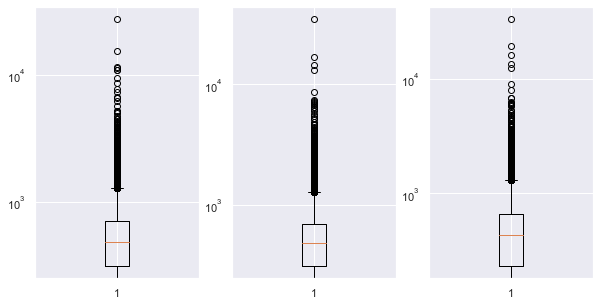

In [61]:
# Box plot for distribution of data monthwise, also to see the outliers
plt.figure(figsize = (10, 5))
sns.set(font_scale = 1.0)

plt.subplot(1,3,1)
plt.boxplot(df['arpu_6'])
plt.yscale('log')

plt.subplot(1,3,2)
plt.boxplot(df['arpu_7'])
plt.yscale('log')

plt.subplot(1,3,3)
plt.boxplot(df['arpu_8'])
plt.yscale('log')
plt.show()

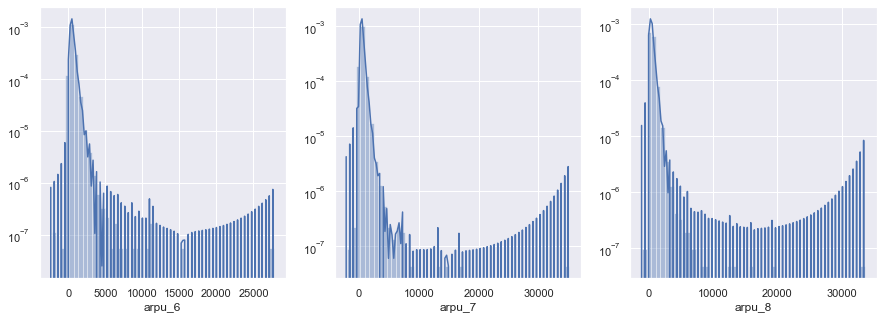

In [62]:
# Simple density plot for checking distribution of usage across different high value customers in months 6,7 and 8
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1.0)

plt.subplot(1,3,1)
sns.distplot(df['arpu_6'])
plt.yscale('log')

plt.subplot(1,3,2)
sns.distplot(df['arpu_7'])
plt.yscale('log')

plt.subplot(1,3,3)
sns.distplot(df['arpu_8'])
plt.yscale('log')
plt.show()

### 'arpu' distribution across users seems skewed from the above density plot, means arpu is very high on the left side among few selected users.

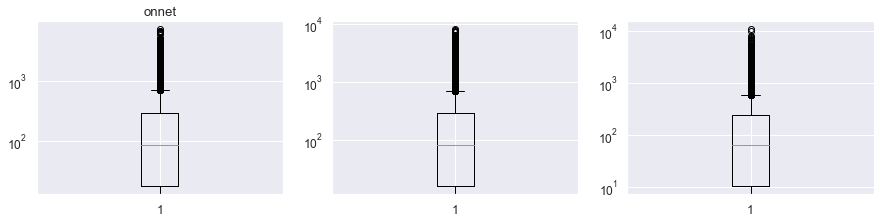

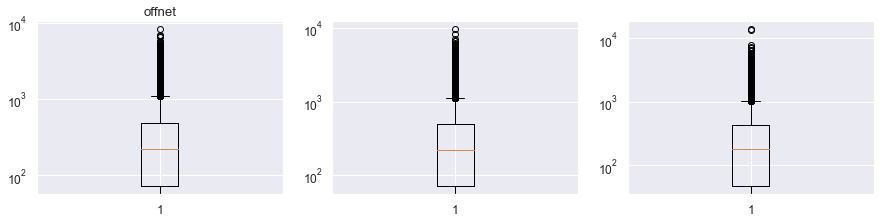

In [63]:
plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.1)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("onnet")
plt.boxplot(df['onnet_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['onnet_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['onnet_mou_8'])
plt.yscale('log')


plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.1)

plt.figure(2)
plt.subplot(2,3,1)
plt.title("offnet")
plt.boxplot(df['offnet_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['offnet_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['offnet_mou_8'])
plt.yscale('log')

plt.show()

### Comparing median values at 50th percentile, in case of 'offnet' these are higher then the same with 'onnet'

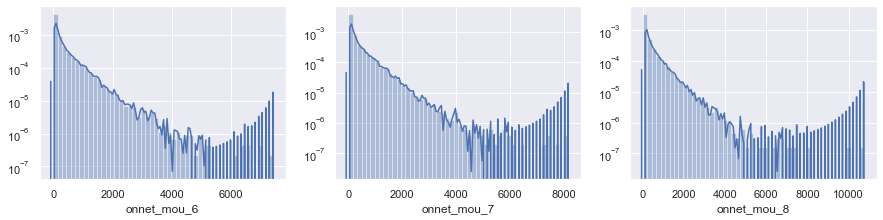

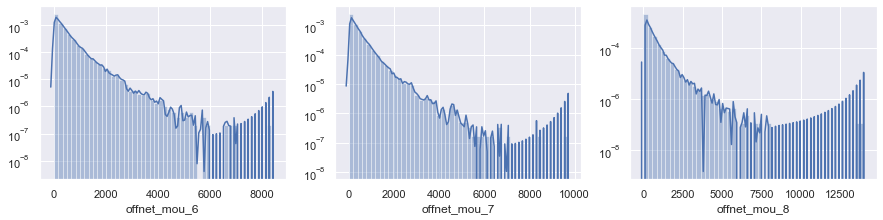

In [64]:
plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['onnet_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['onnet_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['onnet_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['offnet_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['offnet_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['offnet_mou_8'])
plt.yscale('log')


plt.show()

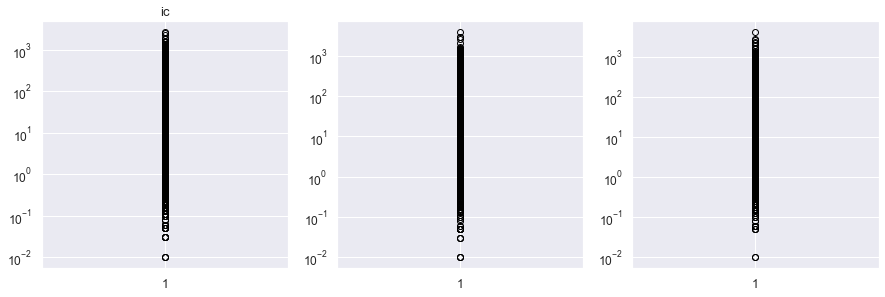

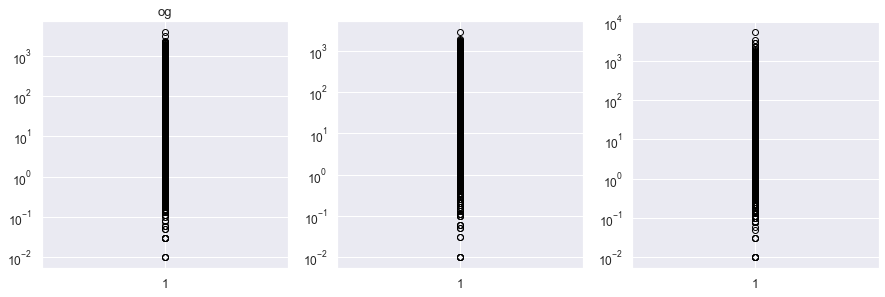

In [65]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.1)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("ic")
plt.boxplot(df['roam_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['roam_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['roam_ic_mou_8'])
plt.yscale('log')


plt.figure(figsize = (15,10))
sns.set(font_scale = 1.1)

plt.figure(2)
plt.subplot(2,3,1)
plt.title("og")
plt.boxplot(df['roam_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['roam_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['roam_og_mou_8'])
plt.yscale('log')

plt.show()

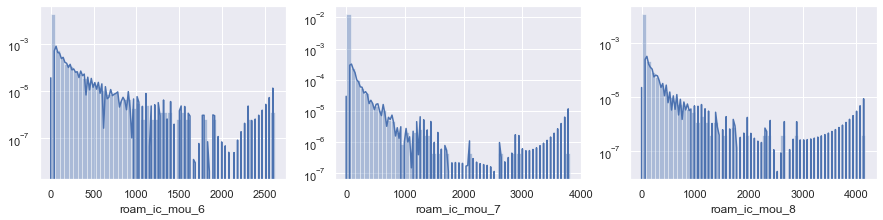

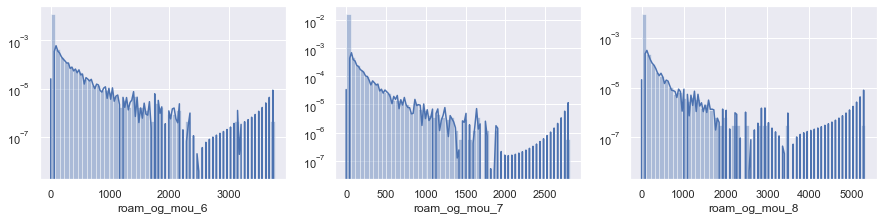

In [66]:
plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['roam_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['roam_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['roam_ic_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['roam_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['roam_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['roam_og_mou_8'])
plt.yscale('log')


plt.show()

#### Very high number of outliers are observed for incoming and outgoing data when customers use roaming service

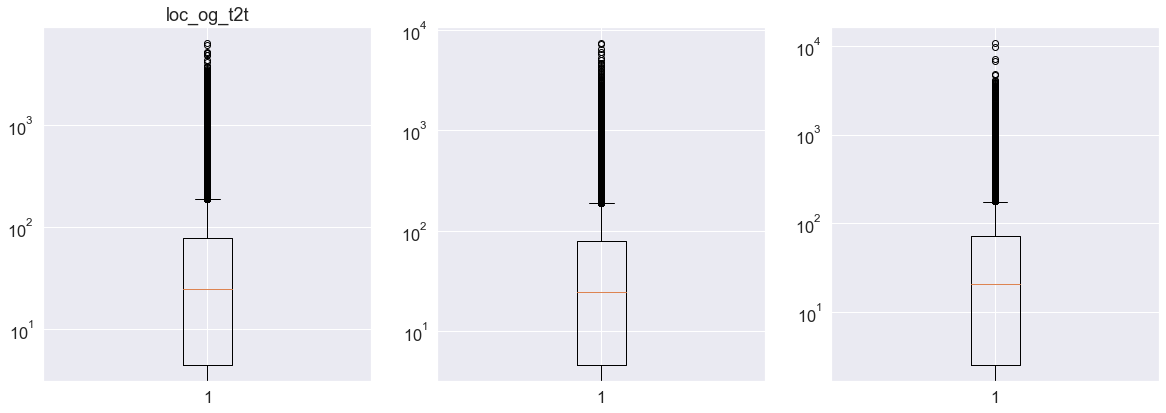

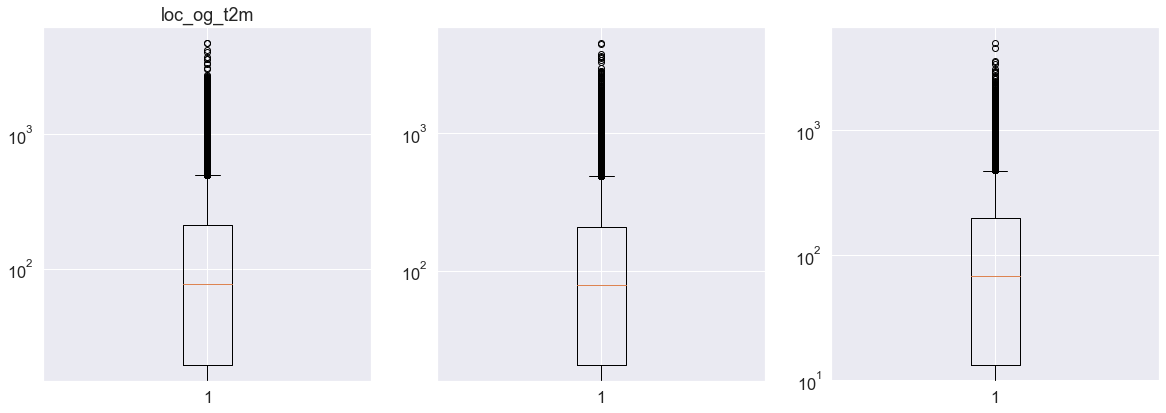

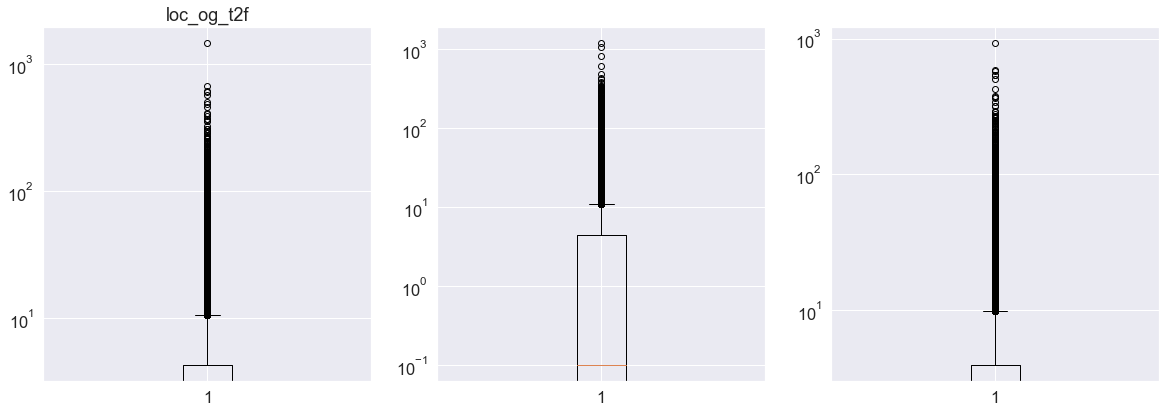

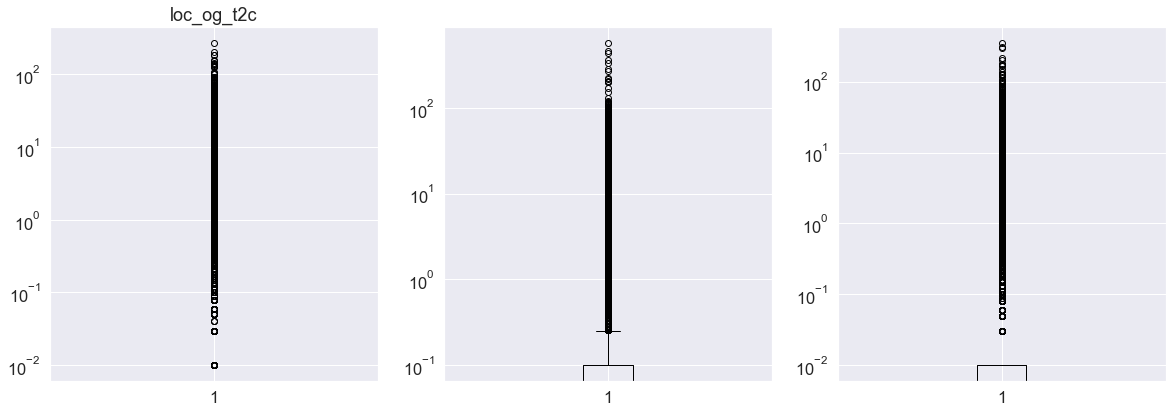

In [67]:
plt.figure(figsize = (20, 30))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(4,3,1)
plt.title("loc_og_t2t")
plt.boxplot(df['loc_og_t2t_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
plt.boxplot(df['loc_og_t2t_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
plt.boxplot(df['loc_og_t2t_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 30))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(4,3,1)
plt.title("loc_og_t2m")
plt.boxplot(df['loc_og_t2m_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
plt.boxplot(df['loc_og_t2m_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
plt.boxplot(df['loc_og_t2m_mou_8'])
plt.yscale('log')

plt.figure(figsize = (20, 30))
sns.set(font_scale = 1.5)

plt.figure(3)
plt.subplot(4,3,1)
plt.title("loc_og_t2f")
plt.boxplot(df['loc_og_t2f_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
plt.boxplot(df['loc_og_t2f_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
plt.boxplot(df['loc_og_t2f_mou_8'])
plt.yscale('log')

plt.figure(figsize = (20, 30))
sns.set(font_scale = 1.5)

plt.figure(4)
plt.subplot(4,3,1)
plt.title("loc_og_t2c")
plt.boxplot(df['loc_og_t2c_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
plt.boxplot(df['loc_og_t2c_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
plt.boxplot(df['loc_og_t2c_mou_8'])
plt.yscale('log')

plt.show()

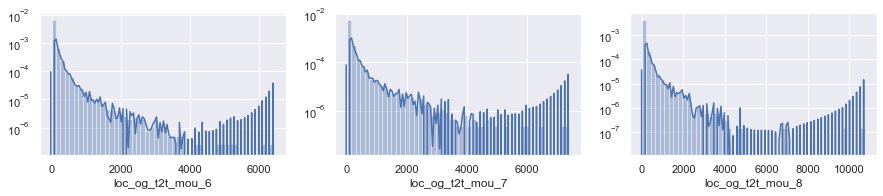

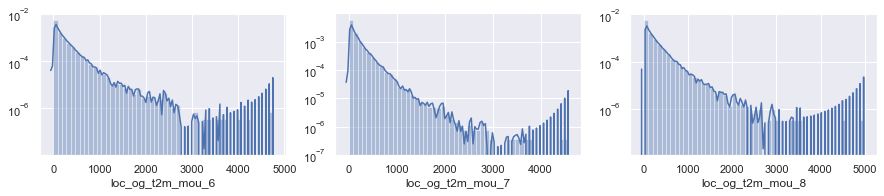

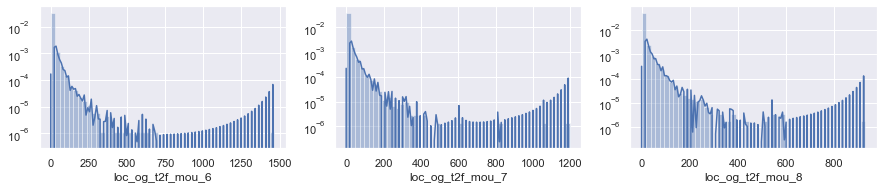

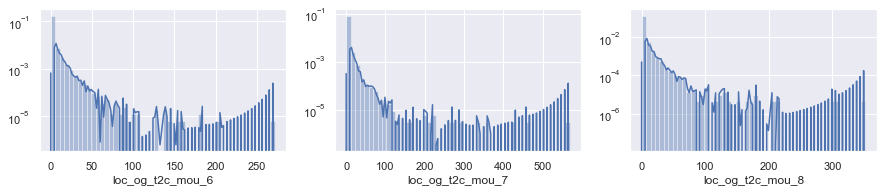

In [68]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(4,3,1)
sns.distplot(df['loc_og_t2t_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_og_t2t_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_og_t2t_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(4,3,1)
sns.distplot(df['loc_og_t2m_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_og_t2m_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_og_t2m_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(3)
plt.subplot(4,3,1)
sns.distplot(df['loc_og_t2f_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_og_t2f_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_og_t2f_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(4)
plt.subplot(4,3,1)
sns.distplot(df['loc_og_t2c_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_og_t2c_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_og_t2c_mou_8'])
plt.yscale('log')

plt.show()

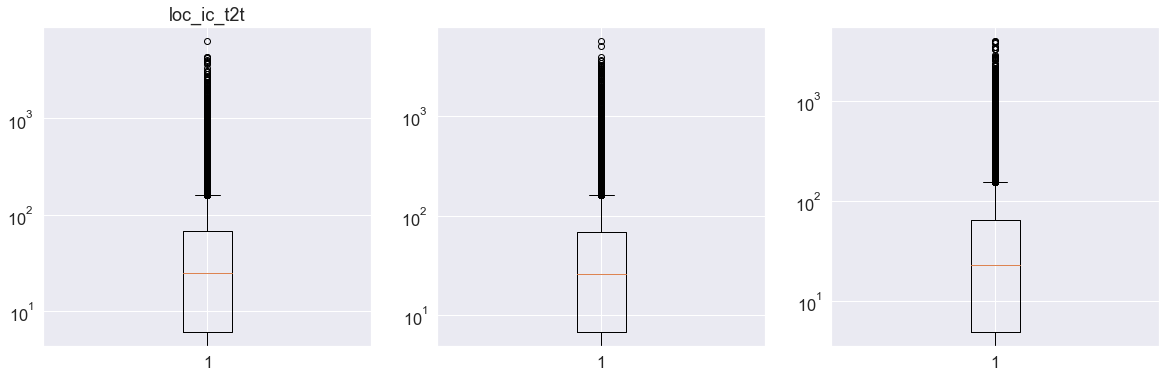

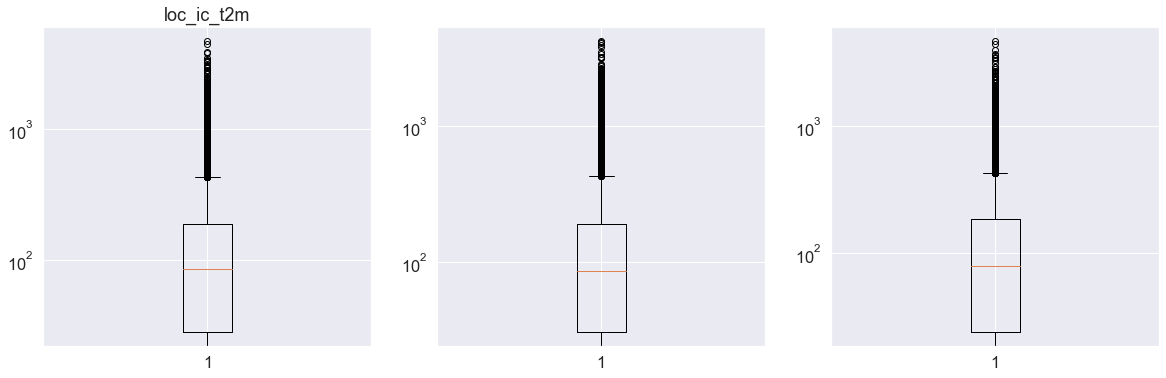

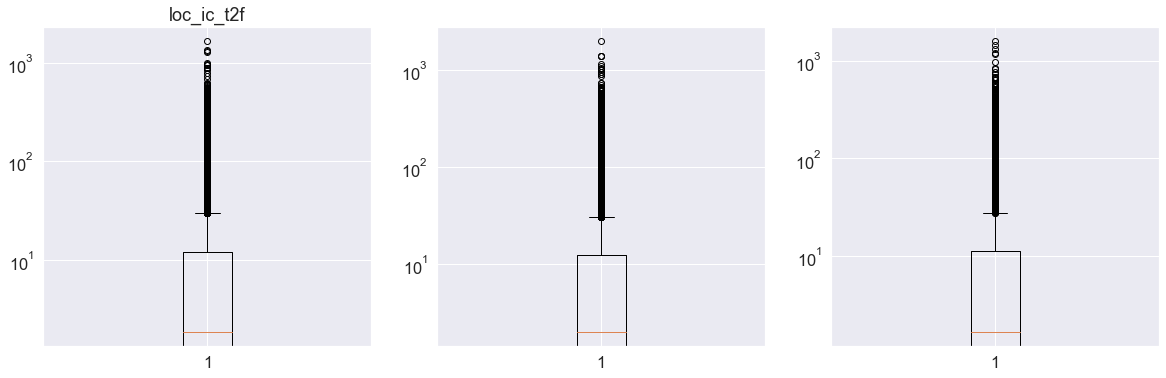

In [69]:
plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(3,3,1)
plt.title("loc_ic_t2t")
plt.boxplot(df['loc_ic_t2t_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['loc_ic_t2t_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['loc_ic_t2t_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(3,3,1)
plt.title("loc_ic_t2m")
plt.boxplot(df['loc_ic_t2m_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['loc_ic_t2m_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['loc_ic_t2m_mou_8'])
plt.yscale('log')

plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(3)
plt.subplot(3,3,1)
plt.title("loc_ic_t2f")
plt.boxplot(df['loc_ic_t2f_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['loc_ic_t2f_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['loc_ic_t2f_mou_8'])
plt.yscale('log')


plt.show()

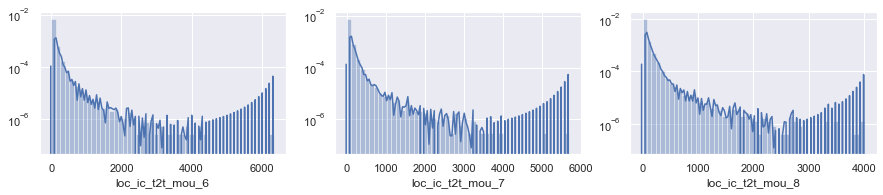

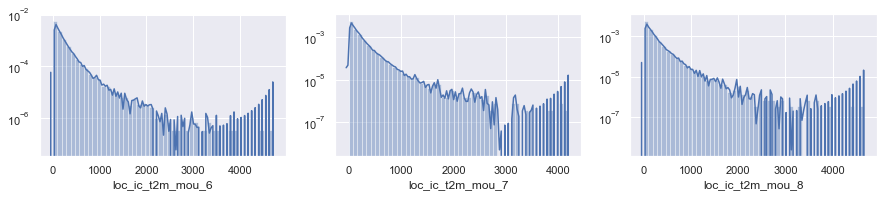

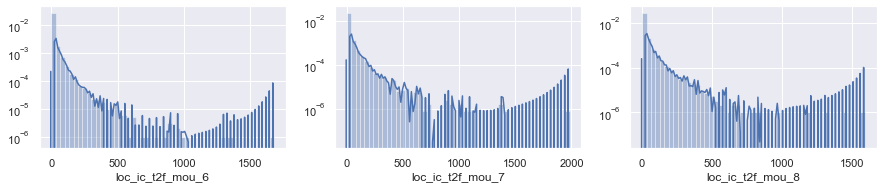

In [70]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(4,3,1)
sns.distplot(df['loc_ic_t2t_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_ic_t2t_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_ic_t2t_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(4,3,1)
sns.distplot(df['loc_ic_t2m_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_ic_t2m_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_ic_t2m_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(3)
plt.subplot(4,3,1)
sns.distplot(df['loc_ic_t2f_mou_6'])
plt.yscale('log')

plt.subplot(4,3,2)
sns.distplot(df['loc_ic_t2f_mou_7'])
plt.yscale('log')

plt.subplot(4,3,3)
sns.distplot(df['loc_ic_t2f_mou_8'])
plt.yscale('log')


plt.show()

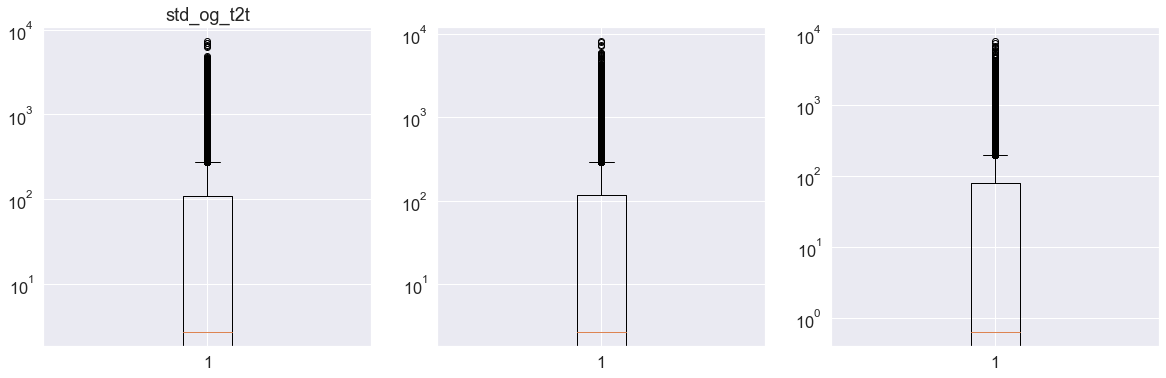

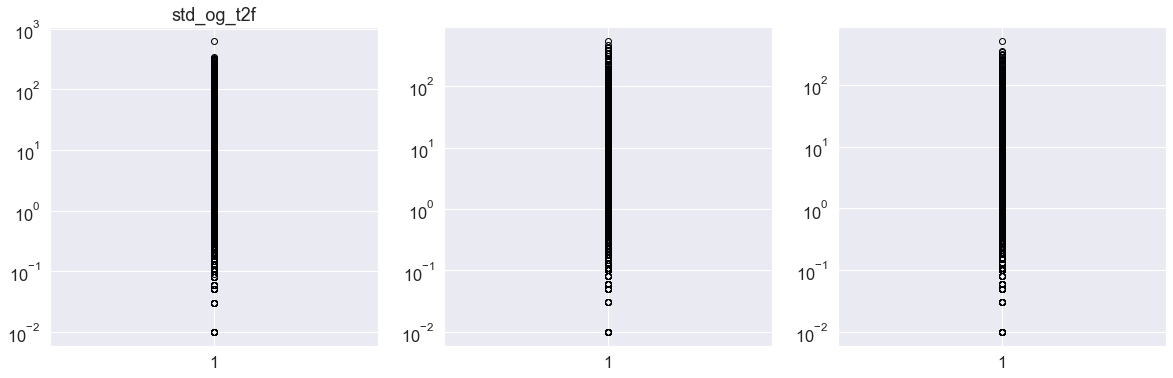

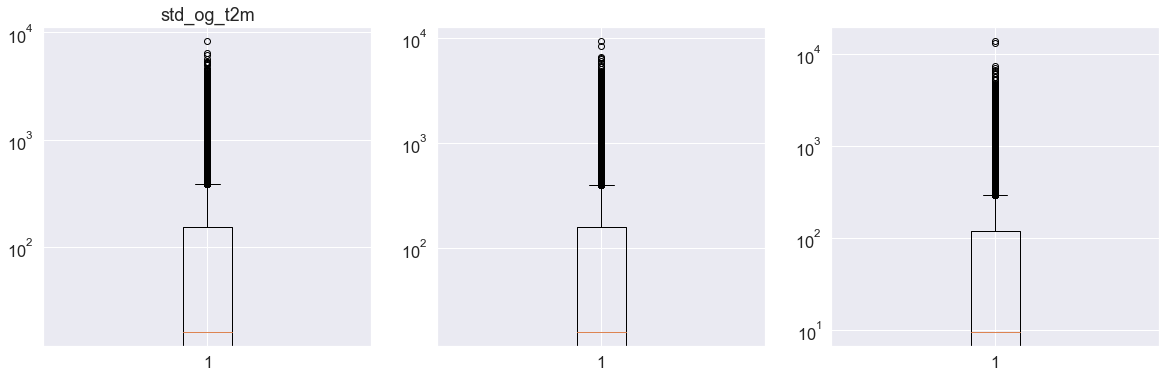

In [71]:
plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(3,3,1)
plt.title("std_og_t2t")
plt.boxplot(df['std_og_t2t_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['std_og_t2t_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['std_og_t2t_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(3,3,1)
plt.title("std_og_t2f")
plt.boxplot(df['std_og_t2f_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['std_og_t2f_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['std_og_t2f_mou_8'])
plt.yscale('log')

plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(3)
plt.subplot(3,3,1)
plt.title("std_og_t2m")
plt.boxplot(df['std_og_t2m_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['std_og_t2m_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['std_og_t2m_mou_8'])
plt.yscale('log')


plt.show()

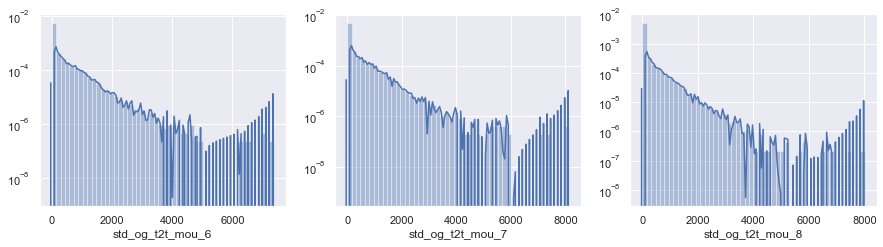

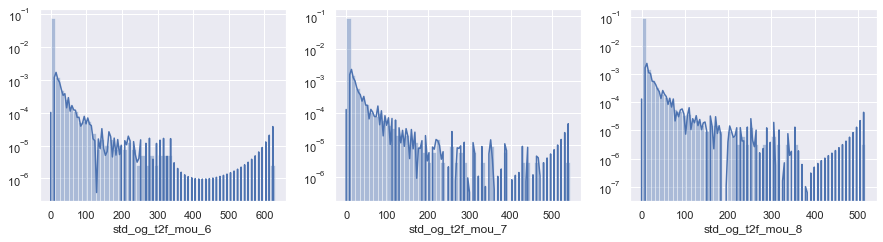

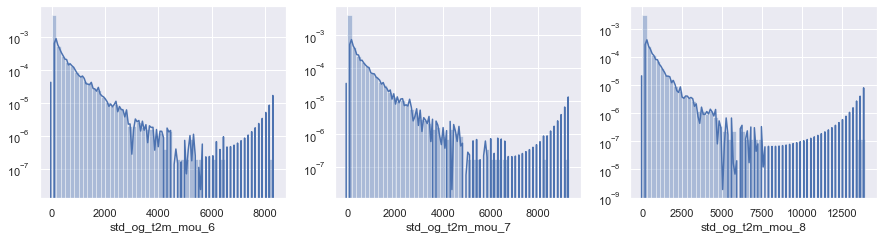

In [72]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(3,3,1)
sns.distplot(df['std_og_t2t_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
sns.distplot(df['std_og_t2t_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
sns.distplot(df['std_og_t2t_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(3,3,1)
sns.distplot(df['std_og_t2f_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
sns.distplot(df['std_og_t2f_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
sns.distplot(df['std_og_t2f_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(3)
plt.subplot(3,3,1)
sns.distplot(df['std_og_t2m_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
sns.distplot(df['std_og_t2m_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
sns.distplot(df['std_og_t2m_mou_8'])
plt.yscale('log')


plt.show()

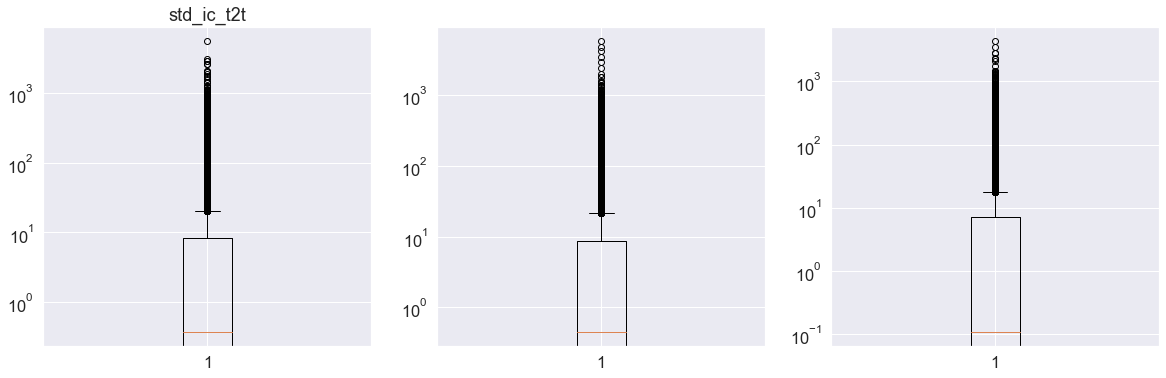

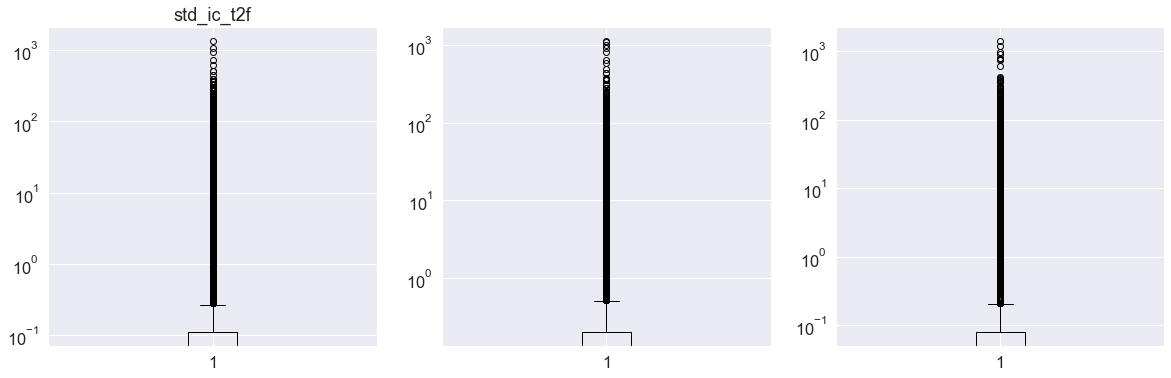

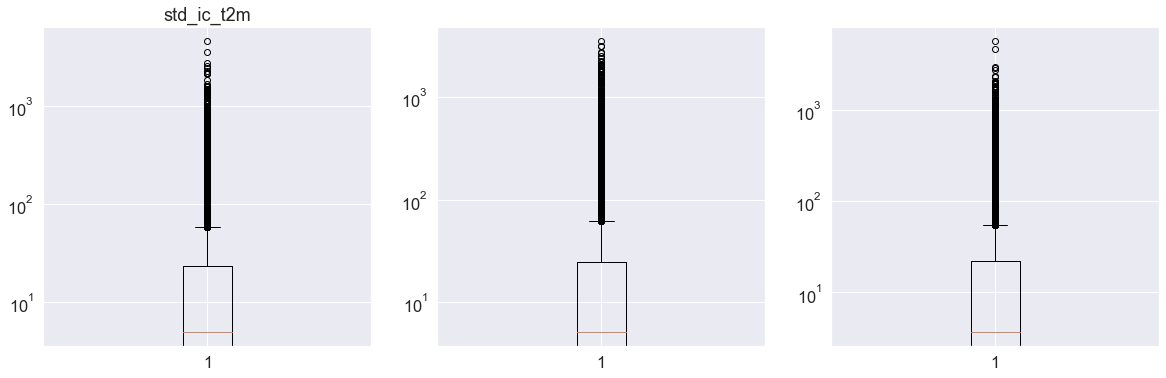

In [73]:
plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(3,3,1)
plt.title("std_ic_t2t")
plt.boxplot(df['std_ic_t2t_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['std_ic_t2t_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['std_ic_t2t_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(3,3,1)
plt.title("std_ic_t2f")
plt.boxplot(df['std_ic_t2f_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['std_ic_t2f_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['std_ic_t2f_mou_8'])
plt.yscale('log')

plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.5)

plt.figure(3)
plt.subplot(3,3,1)
plt.title("std_ic_t2m")
plt.boxplot(df['std_ic_t2m_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
plt.boxplot(df['std_ic_t2m_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
plt.boxplot(df['std_ic_t2m_mou_8'])
plt.yscale('log')


plt.show()

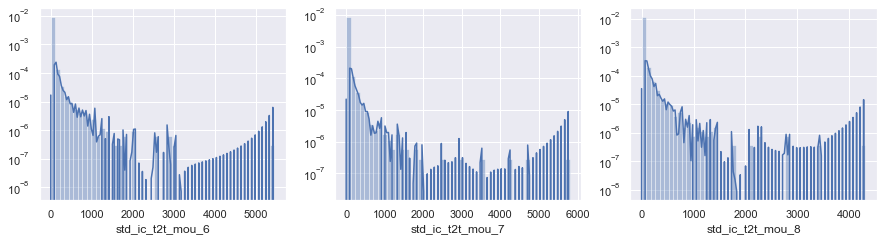

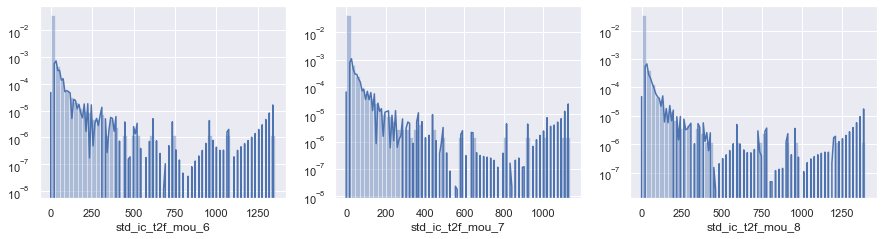

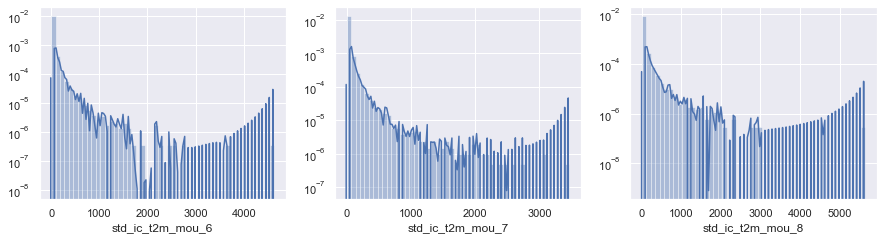

In [74]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(3,3,1)
sns.distplot(df['std_ic_t2t_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
sns.distplot(df['std_ic_t2t_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
sns.distplot(df['std_ic_t2t_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(3,3,1)
sns.distplot(df['std_ic_t2f_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
sns.distplot(df['std_ic_t2f_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
sns.distplot(df['std_ic_t2f_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(3)
plt.subplot(3,3,1)
sns.distplot(df['std_ic_t2m_mou_6'])
plt.yscale('log')

plt.subplot(3,3,2)
sns.distplot(df['std_ic_t2m_mou_7'])
plt.yscale('log')

plt.subplot(3,3,3)
sns.distplot(df['std_ic_t2m_mou_8'])
plt.yscale('log')


plt.show()

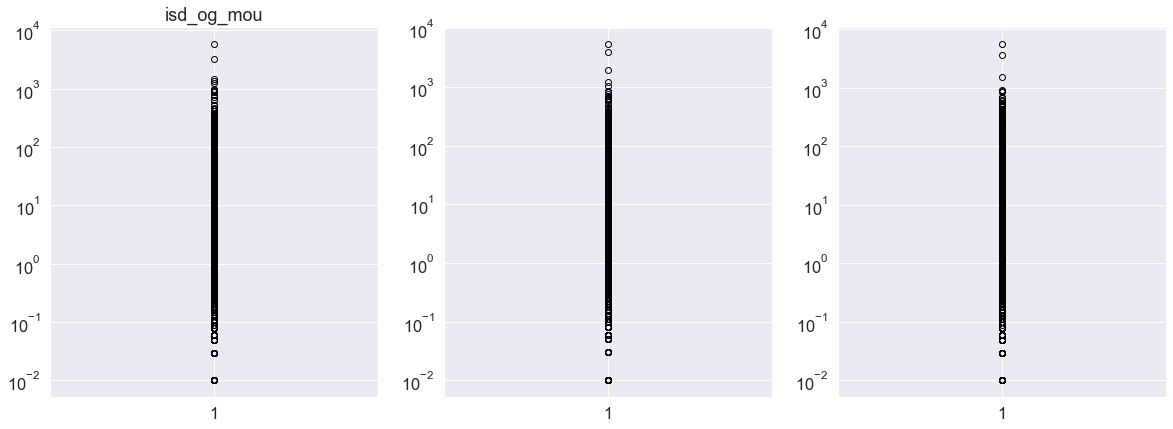

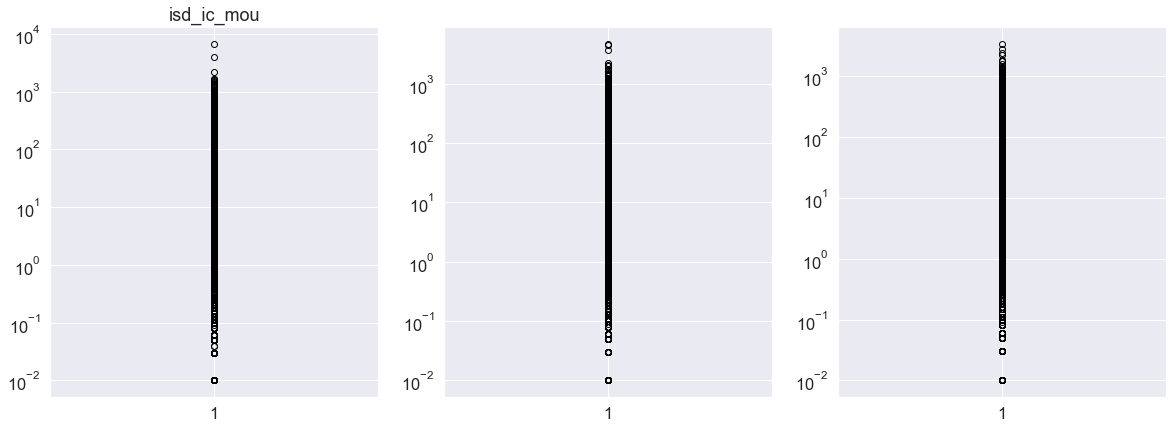

In [75]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("isd_og_mou")
plt.boxplot(df['isd_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['isd_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['isd_og_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(2,3,1)
plt.title("isd_ic_mou")
plt.boxplot(df['isd_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['isd_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['isd_ic_mou_8'])
plt.yscale('log')


plt.show()

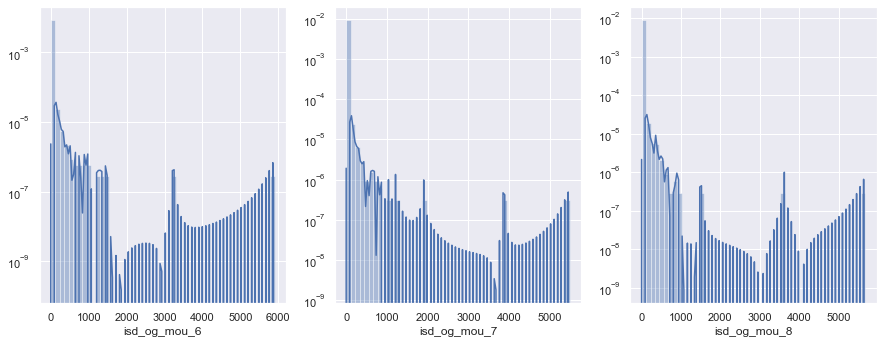

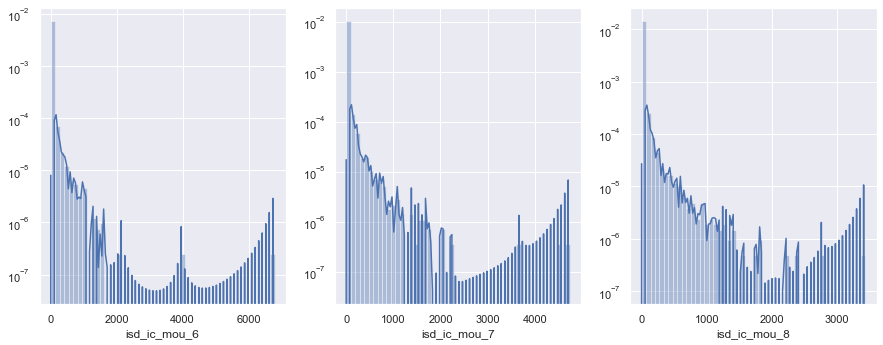

In [76]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['isd_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['isd_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['isd_og_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['isd_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['isd_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['isd_ic_mou_8'])
plt.yscale('log')


plt.show()

#### isd incoming and outgoing calls usage are found to have very high outliers and density distribution functions are also very highly skewed. 

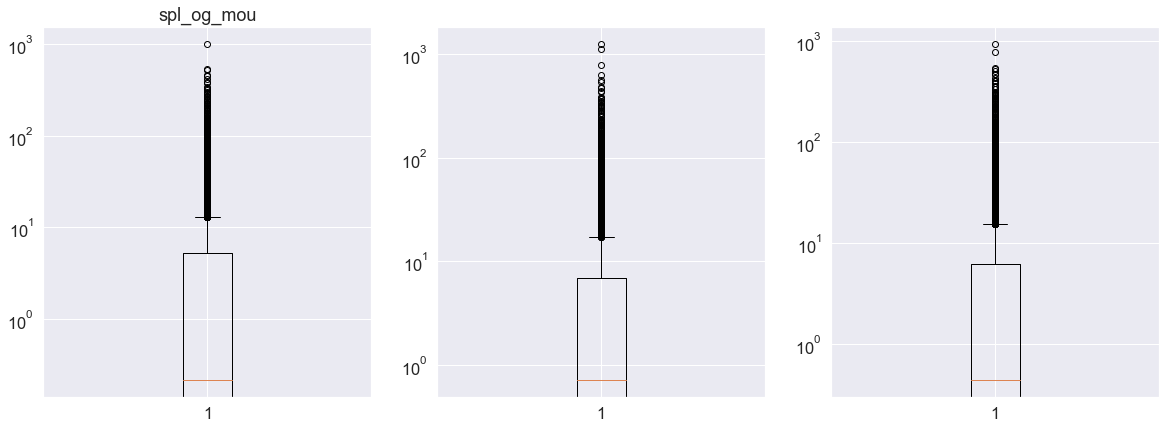

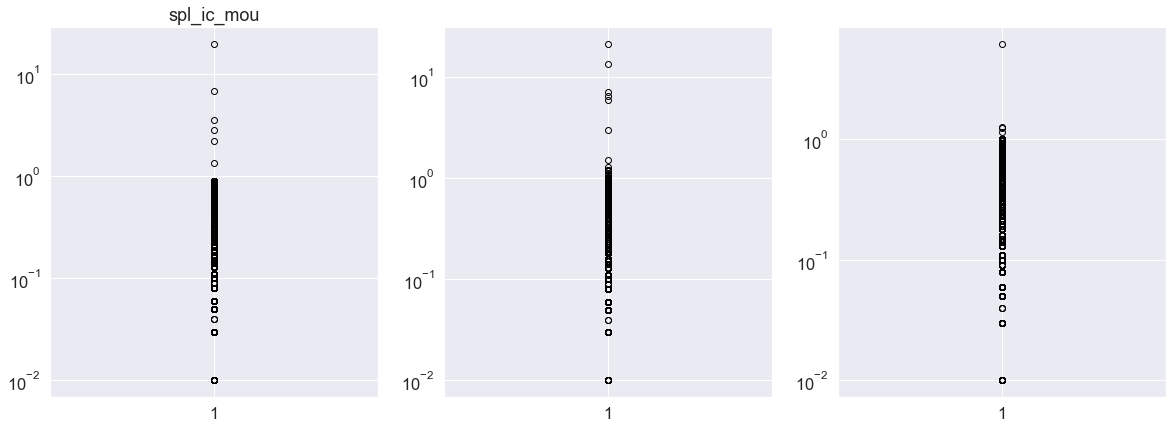

In [77]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("spl_og_mou")
plt.boxplot(df['spl_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['spl_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['spl_og_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(2,3,1)
plt.title("spl_ic_mou")
plt.boxplot(df['spl_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['spl_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['spl_ic_mou_8'])
plt.yscale('log')


plt.show()

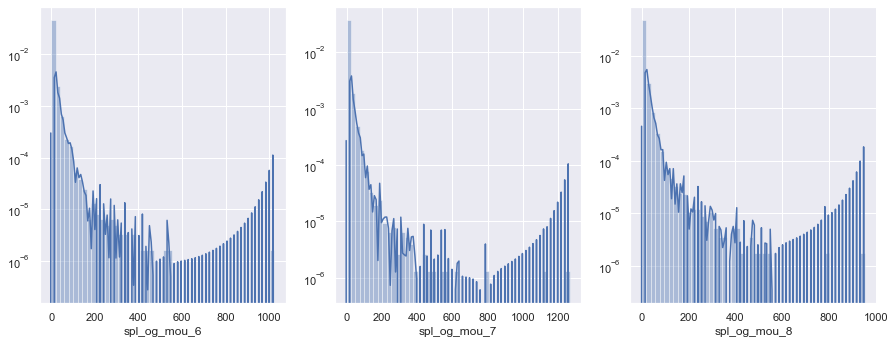

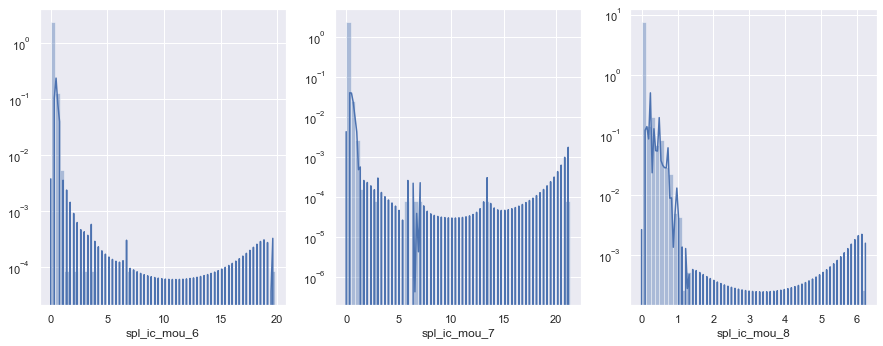

In [78]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['spl_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['spl_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['spl_og_mou_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['spl_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['spl_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['spl_ic_mou_8'])
plt.yscale('log')


plt.show()

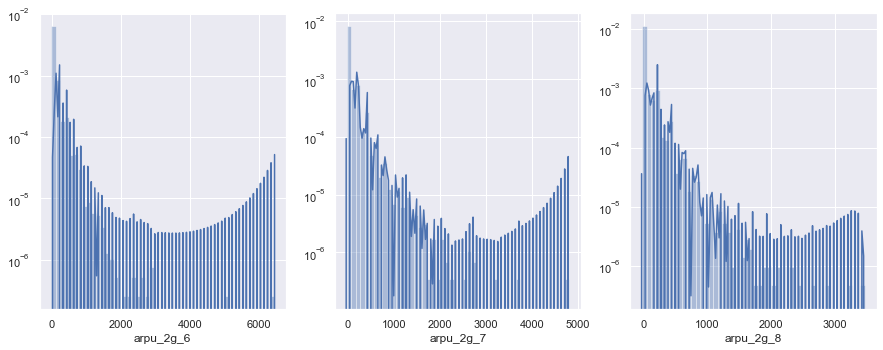

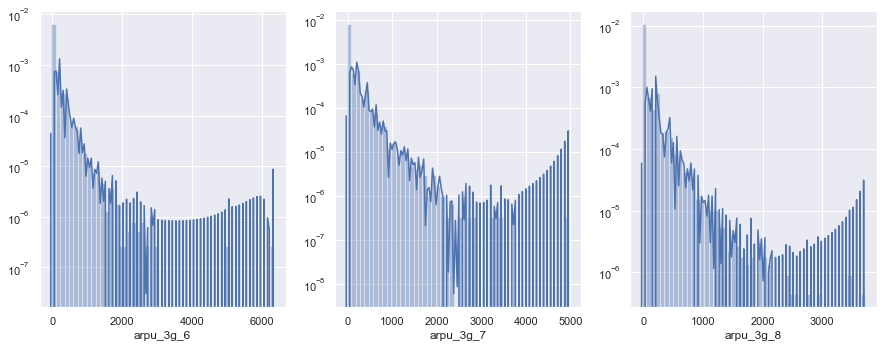

In [79]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['arpu_2g_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['arpu_2g_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['arpu_2g_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['arpu_3g_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['arpu_3g_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['arpu_3g_8'])
plt.yscale('log')


plt.show()

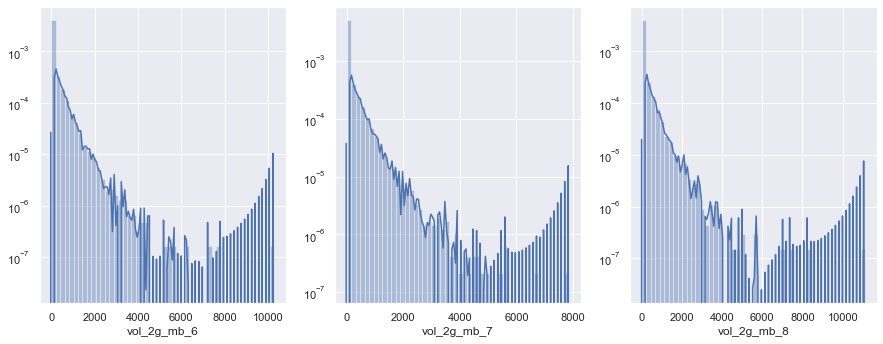

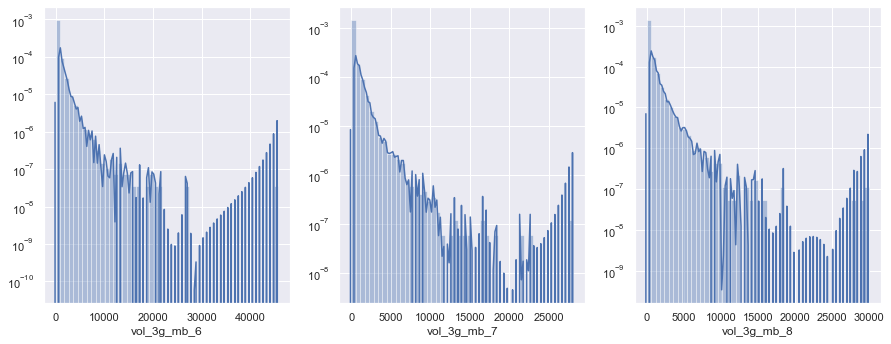

In [80]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['vol_2g_mb_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['vol_2g_mb_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['vol_2g_mb_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['vol_3g_mb_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['vol_3g_mb_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['vol_3g_mb_8'])
plt.yscale('log')


plt.show()

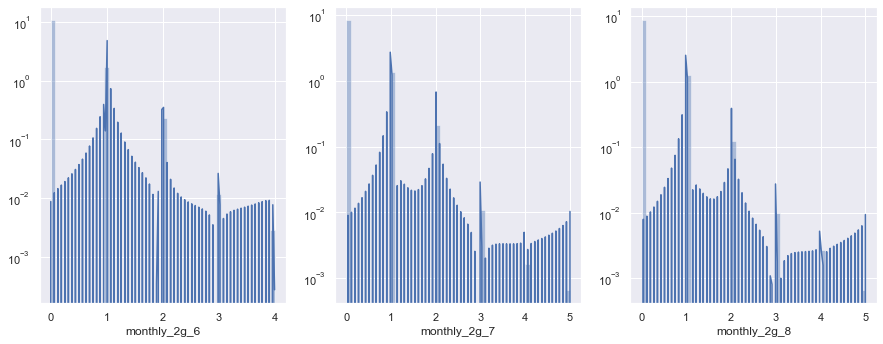

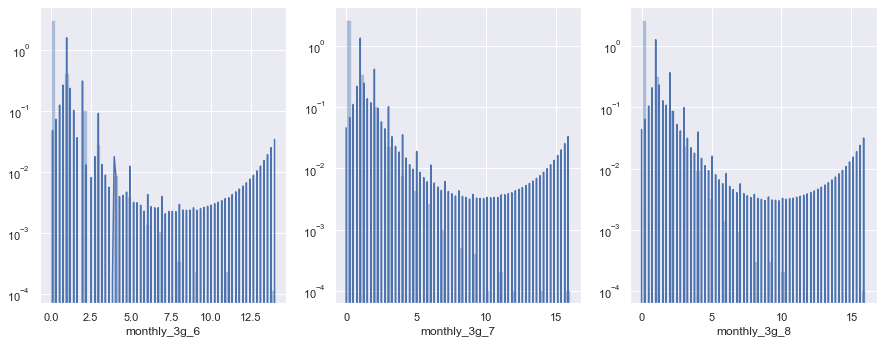

In [81]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['monthly_2g_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['monthly_2g_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['monthly_2g_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['monthly_3g_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['monthly_3g_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['monthly_3g_8'])
plt.yscale('log')


plt.show()

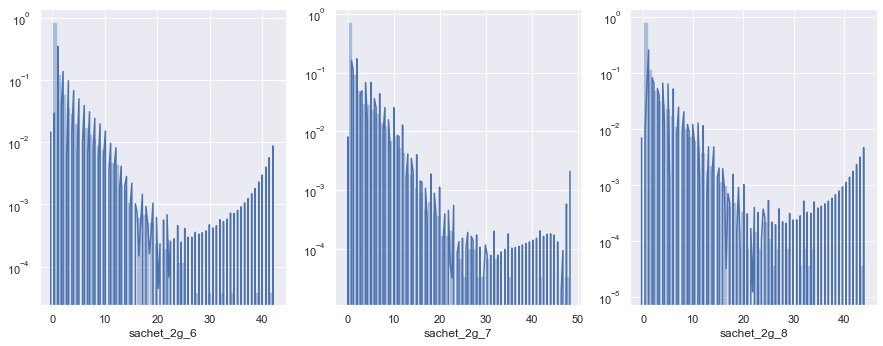

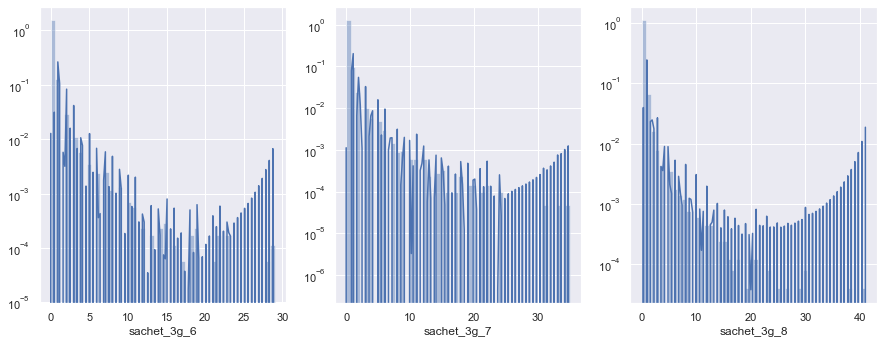

In [82]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['sachet_2g_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['sachet_2g_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['sachet_2g_8'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['sachet_3g_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['sachet_3g_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['sachet_3g_8'])
plt.yscale('log')


plt.show()

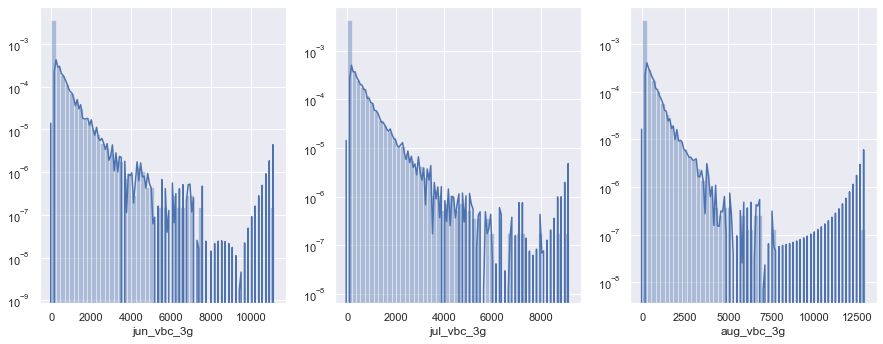

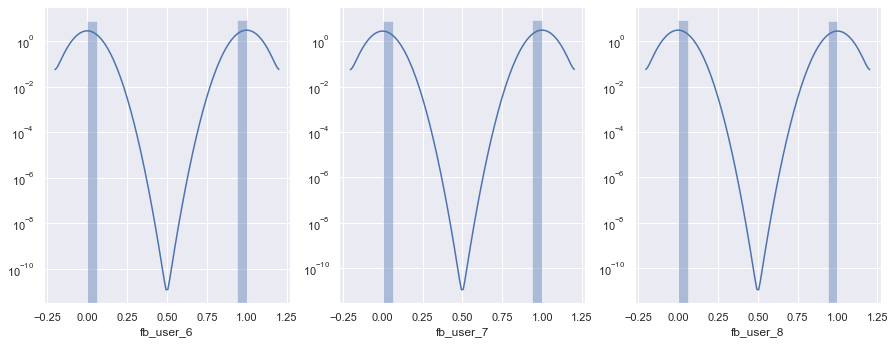

In [83]:
plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(1)
plt.subplot(2,3,1)
sns.distplot(df['jun_vbc_3g'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['jul_vbc_3g'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['aug_vbc_3g'])
plt.yscale('log')

plt.figure(figsize = (15, 12))
sns.set(font_scale = 1.0)

plt.figure(2)
plt.subplot(2,3,1)
sns.distplot(df['fb_user_6'])
plt.yscale('log')

plt.subplot(2,3,2)
sns.distplot(df['fb_user_7'])
plt.yscale('log')

plt.subplot(2,3,3)
sns.distplot(df['fb_user_8'])
plt.yscale('log')


plt.show()

##### Exploratory data analysis basically showed that almost all columns data are having outliers above their maximum and distribution of all columns data are highly skewed.

### Outliers treatment

In [84]:
# Checking outliers at 1%, 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    260.793024    267.819295   
std      460.640461    479.776947    501.961981    459.644368    479.993989   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%         1.000000      0.700000      0.000000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     17.080000     16.030000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
90%      994.099000    995.859000    977.345000    754.160000    784.480000   
95%     1240.964000   1261.272000   1255.019000   1135.440000   1185.790000   
99%     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     234.112539    373.693961    378.103169    335.077044      16.110355   
std      458.448598    482.523558    498.923555    482.062509      76.302156   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.390000     71.610000     69.910000     46.740000       0.000000   
50%       65.610000    222.540000    220.030000    182.790000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
90%      665.080000    895.830000    916.080000    823.680000      27.390000   
95%     1074.590000   1256.610000   1272.290000   1167.540000      84.540000   
99%     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.642504      12.500551      26.571547      20.152086   
std        75.785903      74.125281     116.205525      96.100428   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.290000      15.010000      50.430000      31.090000   
95%        55.640000      56.350000     145.410000     104.240000   
99%       280.460000     282.190000     530.710000     438.590000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       19.865615         84.484753         85.674287         78.077112   
std       104.719009        228.794004        240.525999        227.373609   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.610000          2.530000   
50%         0.000000         24.330000         24.680000         20.730000   
75%         0.000000         77.980000         78.340000         72.040000   
90%        28.880000        187.930000        190.840000        178.840000   
95%       100.510000        322.740000        324.390000        298.780000   
99%       427.030000       1006.360000       1018.530000        913.330000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og

Here for many columns, sudden jump in values are observed between min to 1% and 99% to max, so values between 1% to 99% quantiles might be considered for this analysis, but it should not affect the original class imbalance, so this should be verified after outliers treatment

In [85]:
col = df.columns

In [86]:
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_data_rech_amt_6', 'total_data_rech_amt_7', 'gt_rech_amt_6',
       'gt_rech_amt_7', 'av_rech_amt_6_7', 'churn'],
      dtype='object', length=157)

In [87]:
len(df.columns)

157

In [88]:
# Considering quantile values between 1% to 99% for all columns (except for column 'churn') 

numCols = len(df.columns)
df_list = list(df)
minPercentile = 0.01
maxPercentile = 0.99

for i in range(numCols-1):
    df[df_list[i]] = df[df_list[i]].clip((df[df_list[i]].quantile(minPercentile)),(df[df_list[i]].quantile(maxPercentile)))

In [89]:
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  1986.622        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [90]:
# Checking outliers at 1%, 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     548.809784    551.084737    498.243103    252.166035    258.623657   
std      358.130151    360.433210    383.295094    403.510223    418.167038   
min        1.000000      0.700000      0.000000      0.000000      0.000000   
1%         1.000000      0.700000      0.000000      0.000000      0.000000   
25%      309.865000    309.826000    231.473000     17.080000     16.030000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
90%      994.099000    995.859000    977.345000    754.160000    784.480000   
95%     1240.964000   1261.272000   1255.019000   1135.440000   1185.790000   
99%     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   
max     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   
mean     224.895572    365.893079    369.516995    325.038955      13.572928   
std      390.856953    434.200835    443.919067    409.754119      49.336952   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.390000     71.610000     69.910000     46.740000       0.000000   
50%       65.610000    222.540000    220.030000    182.790000       0.000000   
75%      239.960000    487.940000    494.010000    438.890000       0.000000   
90%      665.080000    895.830000    916.080000    823.680000      27.390000   
95%     1074.590000   1256.610000   1272.290000   1167.540000      84.540000   
99%     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   
max     2159.110000   2326.360000   2410.890000   2193.130000     342.440000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean        9.636307       9.763929      22.732495      16.688892   
std        38.699269      38.946961      79.312550      62.862903   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.290000      15.010000      50.430000      31.090000   
95%        55.640000      56.350000     145.410000     104.240000   
99%       280.460000     282.190000     530.710000     438.590000   
max       280.460000     282.190000     530.710000     438.590000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30001.000000      30001.000000      30001.000000      30001.000000   
mean       15.985223         76.276691         76.684236         69.731313   
std        60.492319        149.890333        150.825195        136.796483   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.610000          2.530000   
50%         0.000000         24.330000         24.680000         20.730000   
75%         0.000000         77.980000         78.340000         72.040000   
90%        28.880000        187.930000        190.840000        178.840000   
95%       100.510000        322.740000        324.390000        298.780000   
99%       427.030000       1006.360000       1018.530000        913.330000   
max       427.030000       1006.360000       1018.530000        913.330000   

       loc_og_t2m_mou_6  loc_og

In [91]:
df.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [92]:
round(2441/(27560+2441)*100,2) # checking churn imbalance if it is same as it was before outlier treatments

8.14

Churn imbalance changed from 8.87% to 8.14%, but having big outliers can give completely biased prediction, so slight decrease in the churn is okay here with lesser number of outliers in each column.

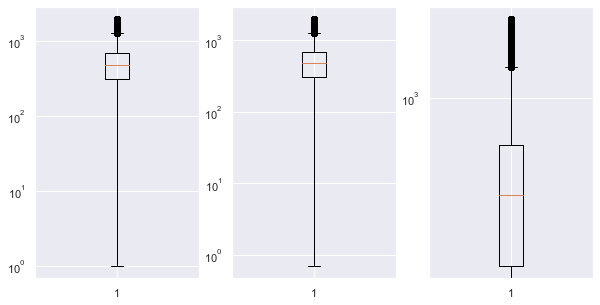

In [93]:
# Box plot for distribution of data monthwise, to see the change in outliers now
plt.figure(figsize = (10, 5))
sns.set(font_scale = 1.0)

plt.subplot(1,3,1)
plt.boxplot(df['arpu_6'])
plt.yscale('log')

plt.subplot(1,3,2)
plt.boxplot(df['arpu_7'])
plt.yscale('log')

plt.subplot(1,3,3)
plt.boxplot(df['arpu_8'])
plt.yscale('log')
plt.show()

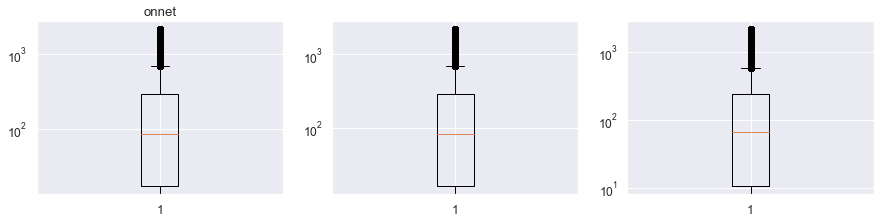

In [94]:
plt.figure(figsize = (15, 7))
sns.set(font_scale = 1.1)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("onnet")
plt.boxplot(df['onnet_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['onnet_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['onnet_mou_8'])
plt.yscale('log')

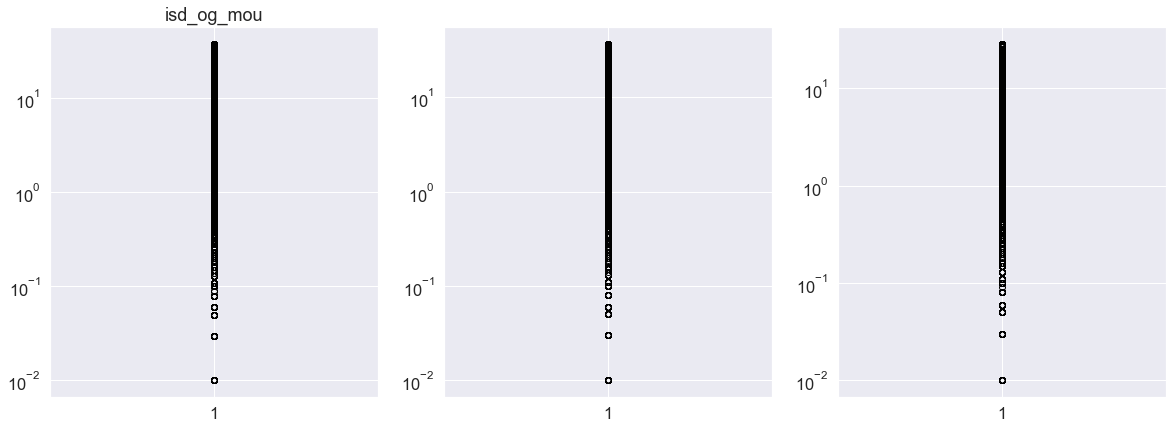

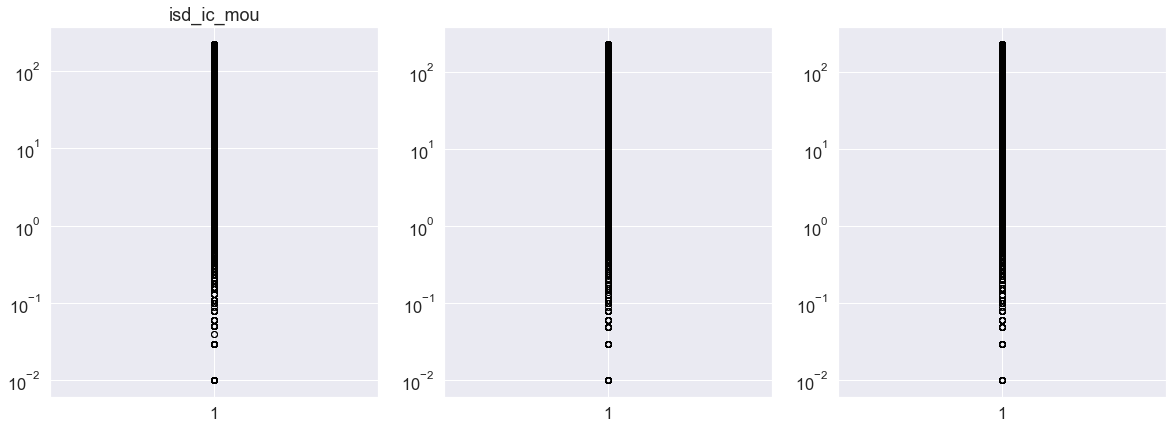

In [95]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("isd_og_mou")
plt.boxplot(df['isd_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['isd_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['isd_og_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(2,3,1)
plt.title("isd_ic_mou")
plt.boxplot(df['isd_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['isd_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['isd_ic_mou_8'])
plt.yscale('log')


plt.show()

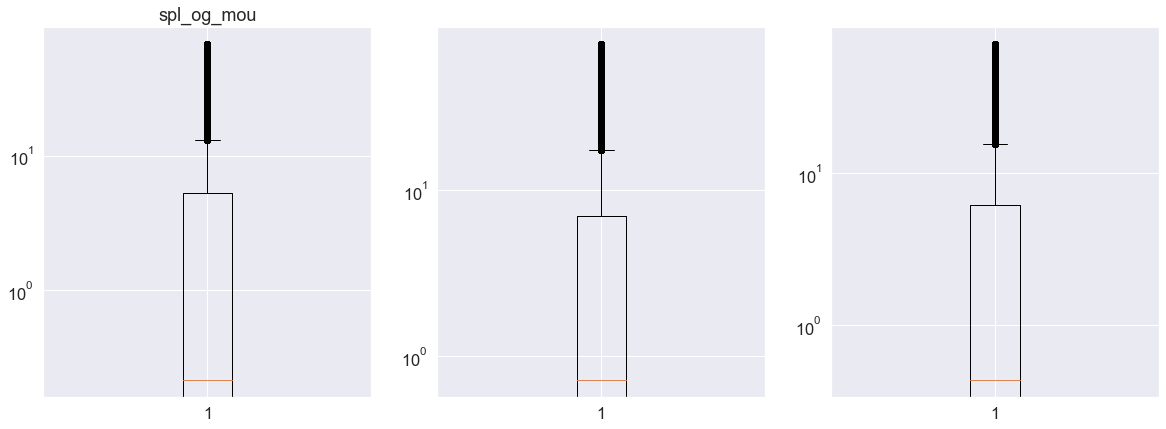

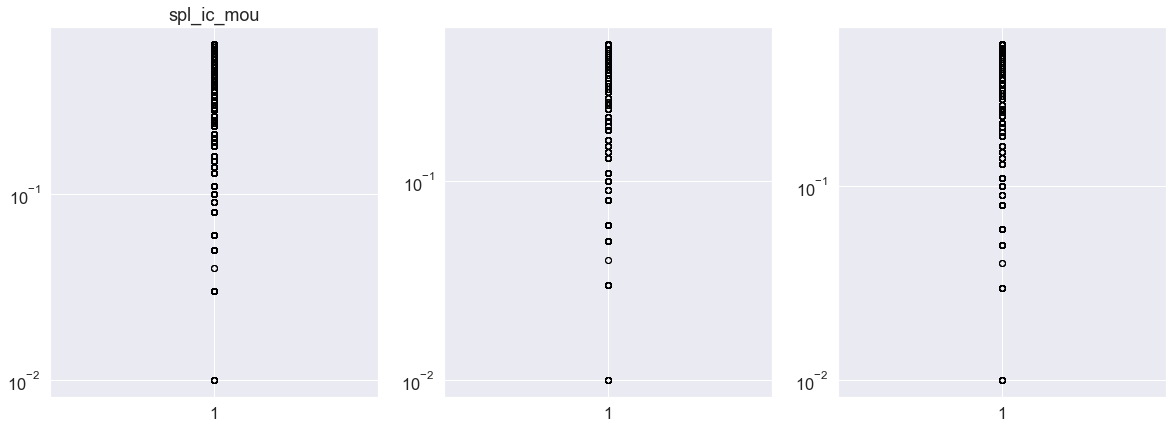

In [96]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(1)
plt.subplot(2,3,1)
plt.title("spl_og_mou")
plt.boxplot(df['spl_og_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['spl_og_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['spl_og_mou_8'])
plt.yscale('log')


plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)

plt.figure(2)
plt.subplot(2,3,1)
plt.title("spl_ic_mou")
plt.boxplot(df['spl_ic_mou_6'])
plt.yscale('log')

plt.subplot(2,3,2)
plt.boxplot(df['spl_ic_mou_7'])
plt.yscale('log')

plt.subplot(2,3,3)
plt.boxplot(df['spl_ic_mou_8'])
plt.yscale('log')


plt.show()

Outliers treatment has reduced outliers in the dataset; complete removal of this has not been considered, as it can reduce the existing churn rate significantly and hence will not meet the business objective.

## Creating New Features

### We can create more variables by comparing the variables from Good phase(6,7) with action phase(8)

For all parameters, like average revenue, incoming call usage, etc., we can create a variable that shows if the user did more during the action phase than good phase (June and July combined).

If the user usage is going down in the action phase, it is good to understand for the company to get in touch with them with offers as they may likely churn at a later stage.

In [97]:
df['AVG_arpu_6_7'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['is_arpu_grtr_actphase'] = np.where((df['arpu_8'] > df['AVG_arpu_6_7']), 1, 0)

df['AVG_onnet_mou_6_7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['is_onnet_grtr_actphase'] = np.where((df['onnet_mou_8'] > df['AVG_onnet_mou_6_7']), 1, 0)

df['AVG_offnet_mou_6_7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['is_offnet_grtr_actphase'] = np.where((df['offnet_mou_8'] > df['AVG_offnet_mou_6_7']), 1, 0)

df['AVG_roam_ic_mou_6_7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['is_roam_ic_grtr_actphase'] = np.where((df['roam_ic_mou_8'] > df['AVG_roam_ic_mou_6_7']), 1, 0)

df['AVG_roam_og_mou_6_7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['is_roam_og_grtr_actphase'] = np.where((df['roam_og_mou_8'] > df['AVG_roam_og_mou_6_7']), 1, 0)

df['AVG_loc_og_t2t_mou_6_7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['is_loc_og_t2t_grtr_actphase'] = np.where((df['loc_og_t2t_mou_8'] > df['AVG_loc_og_t2t_mou_6_7']), 1, 0)

df['AVG_loc_og_t2m_mou_6_7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['is_loc_og_t2m_grtr_actphase'] = np.where((df['loc_og_t2m_mou_8'] > df['AVG_loc_og_t2m_mou_6_7']), 1, 0)

df['AVG_loc_og_t2f_mou_6_7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['is_loc_og_t2f_grtr_actphase'] = np.where((df['loc_og_t2f_mou_8'] > df['AVG_loc_og_t2f_mou_6_7']), 1, 0)

df['AVG_loc_og_t2c_mou_6_7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['is_loc_og_t2c_grtr_actphase'] = np.where((df['loc_og_t2c_mou_8'] > df['AVG_loc_og_t2c_mou_6_7']), 1, 0)

df['AVG_std_og_t2t_mou_6_7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['is_std_og_t2t_grtr_actphase'] = np.where((df['std_og_t2t_mou_8'] > df['AVG_std_og_t2t_mou_6_7']), 1, 0)

df['AVG_std_og_t2m_mou_6_7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['is_std_og_t2m_grtr_actphase'] = np.where((df['std_og_t2m_mou_8'] > df['AVG_std_og_t2m_mou_6_7']), 1, 0)

df['AVG_std_og_t2f_mou_6_7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['is_std_og_t2f_grtr_actphase'] = np.where((df['std_og_t2f_mou_8'] > df['AVG_std_og_t2f_mou_6_7']), 1, 0)

df['AVG_isd_og_mou_6_7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['is_isd_og_grtr_actphase'] = np.where((df['isd_og_mou_8'] > df['AVG_isd_og_mou_6_7']), 1, 0)

df['AVG_spl_og_mou_6_7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['is_spl_og_grtr_actphase'] = np.where((df['spl_og_mou_8'] > df['AVG_spl_og_mou_6_7']), 1, 0)

df['AVG_og_others_6_7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['is_og_others_grtr_actphase'] = np.where((df['og_others_8'] > df['AVG_og_others_6_7']), 1, 0)

df['AVG_loc_ic_t2t_mou_6_7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['is_loc_ic_t2t_grtr_actphase'] = np.where((df['loc_ic_t2t_mou_8'] > df['AVG_loc_ic_t2t_mou_6_7']), 1, 0)

df['AVG_loc_ic_t2m_mou_6_7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['is_loc_ic_t2m_grtr_actphase'] = np.where((df['loc_ic_t2m_mou_8'] > df['AVG_loc_ic_t2m_mou_6_7']), 1, 0)

df['AVG_loc_ic_t2f_mou_6_7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['is_loc_ic_t2f_grtr_actphase'] = np.where((df['loc_ic_t2f_mou_8'] > df['AVG_loc_ic_t2f_mou_6_7']), 1, 0)

df['AVG_std_ic_t2t_mou_6_7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['is_std_ic_t2t_grtr_actphase'] = np.where((df['std_ic_t2t_mou_8'] > df['AVG_std_ic_t2t_mou_6_7']), 1, 0)

df['AVG_std_ic_t2m_mou_6_7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['is_std_ic_t2m_grtr_actphase'] = np.where((df['std_ic_t2m_mou_8'] > df['AVG_std_ic_t2m_mou_6_7']), 1, 0)

df['AVG_std_ic_t2f_mou_6_7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['is_std_ic_t2f_grtr_actphase'] = np.where((df['std_ic_t2f_mou_8'] > df['AVG_std_ic_t2f_mou_6_7']), 1, 0)

df['AVG_spl_ic_mou_6_7'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['is_spl_ic_grtr_actphase'] = np.where((df['spl_ic_mou_8'] > df['AVG_spl_ic_mou_6_7']), 1, 0)

df['AVG_isd_ic_mou_6_7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['is_isd_ic_grtr_actphase'] = np.where((df['isd_ic_mou_8'] > df['AVG_isd_ic_mou_6_7']), 1, 0)

df['AVG_ic_others_6_7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['is_ic_others_grtr_actphase'] = np.where((df['ic_others_8'] > df['AVG_ic_others_6_7']), 1, 0)

df['AVG_total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['is_total_rech_amt_grtr_actphase'] = np.where((df['total_rech_amt_8'] > df['AVG_total_rech_amt_6_7']), 1, 0)

df['AVG_vol_2g_mb_6_7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['is_vol_2g_mb_grtr_actphase'] = np.where((df['vol_2g_mb_8'] > df['AVG_vol_2g_mb_6_7']), 1, 0)

df['AVG_vol_3g_mb_6_7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['is_vol_3g_mb_grtr_actphase'] = np.where((df['vol_3g_mb_8'] > df['AVG_vol_3g_mb_6_7']), 1, 0)

df['AVG_arpu_3g_6_7'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['is_arpu_3g_grtr_actphase'] = np.where((df['arpu_3g_8'] > df['AVG_arpu_3g_6_7']), 1, 0)

df['AVG_arpu_2g_6_7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['is_arpu_2g_grtr_actphase'] = np.where((df['arpu_2g_8'] > df['AVG_arpu_2g_6_7']), 1, 0)

df['AVG_vbc_3g_6_7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['is_vbc_3g_grtr_actphase'] = np.where((df['aug_vbc_3g'] > df['AVG_vbc_3g_6_7']), 1, 0)

df['AVG_loc_og_mou_6_7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['is_loc_og_grtr_actphase'] = np.where((df['loc_og_mou_8'] > df['AVG_loc_og_mou_6_7']), 1, 0)

df['AVG_std_og_mou_6_7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['is_std_og_grtr_actphase'] = np.where((df['std_og_mou_8'] > df['AVG_std_og_mou_6_7']), 1, 0)

df['AVG_total_og_mou_6_7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['is_total_og_grtr_actphase'] = np.where((df['total_og_mou_8'] > df['AVG_total_og_mou_6_7']), 1, 0)

df['AVG_loc_ic_mou_6_7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['is_loc_ic_grtr_actphase'] = np.where((df['loc_ic_mou_8'] > df['AVG_loc_ic_mou_6_7']), 1, 0)

df['AVG_std_ic_mou_6_7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['is_std_ic_grtr_actphase'] = np.where((df['std_ic_mou_8'] > df['AVG_std_ic_mou_6_7']), 1, 0)

df['AVG_total_ic_mou_6_7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['is_total_ic_grtr_actphase'] = np.where((df['total_ic_mou_8'] > df['AVG_total_ic_mou_6_7']), 1, 0)

df['AVG_night_pck_user_6_7'] = df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df['is_night_pck_user_grtr_actphase'] = np.where((df['night_pck_user_8'] > df['AVG_night_pck_user_6_7']), 1, 0)

df['AVG_monthly_2g_6_7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['is_monthly_2g_grtr_actphase'] = np.where((df['monthly_2g_8'] > df['AVG_monthly_2g_6_7']), 1, 0)

df['AVG_sachet_2g_6_7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['is_sachet_2g_grtr_actphase'] = np.where((df['sachet_2g_8'] > df['AVG_sachet_2g_6_7']), 1, 0)

df['AVG_monthly_3g_6_7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['is_monthly_3g_grtr_actphase'] = np.where((df['monthly_3g_8'] > df['AVG_monthly_3g_6_7']), 1, 0)

df['AVG_sachet_3g_6_7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['is_sachet_3g_grtr_actphase'] = np.where((df['sachet_3g_8'] > df['AVG_sachet_3g_6_7']), 1, 0)

df['AVG_fb_user_6_7'] = df[['fb_user_6','fb_user_7']].mean(axis=1)
df['is_fb_user_grtr_actphase'] = np.where((df['fb_user_8'] > df['AVG_fb_user_6_7']), 1, 0)


In [98]:
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  1986.622        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

Creating features to understand the difference in usage between months to understand the user's usage behaviour

In [99]:
df['loc_og_t2t_mou_diff_7_6'] = df['loc_og_t2t_mou_7'] - df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_diff_7_6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_diff_7_6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_diff_7_6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_diff_7_6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_diff_7_6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_diff_7_6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_diff_7_6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_diff_7_6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_diff_7_6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_diff_7_6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_diff_7_6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_diff_7_6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_diff_7_6'] = df['og_others_7'] - df['og_others_6']
df['total_og_mou_diff_7_6'] = df['total_og_mou_7'] - df['total_og_mou_6']

In [100]:
df['loc_og_t2t_mou_diff_8_7'] = df['loc_og_t2t_mou_8'] - df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_diff_8_7'] = df['loc_og_t2m_mou_8'] - df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_diff_8_7'] = df['loc_og_t2f_mou_8'] - df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_diff_8_7'] = df['loc_og_t2c_mou_8'] - df['loc_og_t2c_mou_7']
df['loc_og_mou_diff_8_7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_t2t_mou_diff_8_7'] = df['std_og_t2t_mou_8'] - df['std_og_t2t_mou_7']
df['std_og_t2m_mou_diff_8_7'] = df['std_og_t2m_mou_8'] - df['std_og_t2m_mou_7']
df['std_og_t2f_mou_diff_8_7'] = df['std_og_t2f_mou_8'] - df['std_og_t2f_mou_7']
df['std_og_mou_diff_8_7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['loc_og_mou_diff_8_7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_mou_diff_8_7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['isd_og_mou_diff_8_7'] = df['isd_og_mou_8'] - df['isd_og_mou_7']
df['spl_og_mou_diff_8_7'] = df['spl_og_mou_8'] - df['spl_og_mou_7']
df['og_others_diff_8_7'] = df['og_others_8'] - df['og_others_7']
df['total_og_mou_diff_8_7'] = df['total_og_mou_8'] - df['total_og_mou_7']

In [101]:
df['loc_ic_t2t_mou_diff_7_6'] = df['loc_ic_t2t_mou_7'] - df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_diff_7_6'] = df['loc_ic_t2m_mou_7'] - df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_diff_7_6'] = df['loc_ic_t2f_mou_7'] - df['loc_ic_t2f_mou_6']
df['loc_ic_mou_diff_7_6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_t2t_mou_diff_7_6'] = df['std_ic_t2t_mou_7'] - df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_diff_7_6'] = df['std_ic_t2m_mou_7'] - df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_diff_7_6'] = df['std_ic_t2f_mou_7'] - df['std_ic_t2f_mou_6']
df['std_ic_mou_diff_7_6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['loc_ic_mou_diff_7_6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_mou_diff_7_6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['spl_ic_mou_diff_7_6'] = df['spl_ic_mou_7'] - df['spl_ic_mou_6']
df['isd_ic_mou_diff_7_6'] = df['isd_ic_mou_7'] - df['isd_ic_mou_6']
df['ic_others_diff_7_6'] = df['ic_others_7'] - df['ic_others_6']
df['total_ic_mou_diff_7_6'] = df['total_ic_mou_7'] - df['total_ic_mou_6']

In [102]:
df['loc_ic_t2t_mou_diff_8_7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_diff_8_7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_diff_8_7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_diff_8_7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_diff_8_7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_diff_8_7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_diff_8_7'] = df['std_ic_t2f_mou_8'] - df['std_ic_t2f_mou_7']
df['std_ic_mou_diff_8_7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_diff_8_7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_diff_8_7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_diff_8_7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_diff_8_7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_diff_8_7'] = df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_diff_8_7'] = df['total_ic_mou_8'] - df['total_ic_mou_7']

In [103]:
df['onnet_mou_diff_7_6'] = df['onnet_mou_7'] - df['onnet_mou_6']
df['onnet_mou_diff_8_7'] = df['onnet_mou_8'] - df['onnet_mou_7']
df['offnet_mou_diff_7_6'] = df['offnet_mou_7'] - df['offnet_mou_6']
df['offnet_mou_diff_8_7'] = df['offnet_mou_8'] - df['offnet_mou_7']
df['roam_ic_mou_diff_7_6'] = df['roam_ic_mou_7'] - df['roam_ic_mou_6']
df['roam_ic_mou_diff_8_7'] = df['roam_ic_mou_8'] - df['roam_ic_mou_7']
df['roam_og_mou_diff_7_6'] = df['roam_og_mou_7'] - df['roam_og_mou_6']
df['roam_og_mou_diff_8_7'] = df['roam_og_mou_8'] - df['roam_og_mou_7']
df['total_rech_amt_diff_7_6'] = df['total_rech_amt_7'] - df['total_rech_amt_6']
df['total_rech_amt_diff_8_7'] = df['total_rech_amt_8'] - df['total_rech_amt_7']

In [104]:
df['vol_2g_mb_diff_7_6'] = df['vol_2g_mb_7'] - df['vol_2g_mb_6']
df['vol_2g_mb_diff_8_7'] = df['vol_2g_mb_8'] - df['vol_2g_mb_7']
df['vol_3g_mb_diff_7_6'] = df['vol_3g_mb_7'] - df['vol_3g_mb_6']
df['vol_3g_mb_diff_8_7'] = df['vol_3g_mb_8'] - df['vol_3g_mb_7']
df['vbc_3g_diff_7_6'] = df['jul_vbc_3g'] - df['jun_vbc_3g']
df['vbc_3g_diff_8_7'] = df['aug_vbc_3g'] - df['jul_vbc_3g']

In [105]:
df.shape

(30001, 307)

Dropping the original features from which we have dervied new features

In [106]:
df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [107]:
df.shape

(30001, 221)

In [108]:
df.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   1986.622        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0               0.00              0.00              0.00          0.00   
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
21              0.18            101.74              0.00        101.93   
23             13.38             43.91              0.00         57.29   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0             5.44           0.0          0.00         0.00                 2   
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
21          261.04           0.0          0.00         0.00                27   
23          298.33           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                252             252             252             252   
7               2341            1000             790             951   
8                120              90             154              30   
21               718              50              50              50   
23               439               0             179             179   

    last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0                  252                 252                 252   
7                    0                   0                 565   
8                   50                   0                  10   
21                  30                  20                  50   
23                   0                 179        

In [109]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 221 columns):
arpu_8                             float64
onnet_mou_8                        float64
offnet_mou_8                       float64
roam_ic_mou_8                      float64
roam_og_mou_8                      float64
loc_og_t2t_mou_8                   float64
loc_og_t2m_mou_8                   float64
loc_og_t2f_mou_8                   float64
loc_og_t2c_mou_8                   float64
loc_og_mou_8                       float64
std_og_t2t_mou_8                   float64
std_og_t2m_mou_8                   float64
std_og_t2f_mou_8                   float64
std_og_mou_8                       float64
isd_og_mou_8                       float64
spl_og_mou_8                       float64
og_others_8                        float64
total_og_mou_8                     float64
loc_ic_t2t_mou_8                   float64
loc_ic_t2m_mou_8                   float64
loc_ic_t2f_mou_8              

### Checking Correlation

In [110]:
correlation_matrix = df.corr()

In [111]:
# map features to their absolute correlation values
corr = correlation_matrix.corr().abs()

In [112]:
mainCorrelationMatrix = correlation_matrix.abs()

In [113]:
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
mainCorrelationMatrix = mainCorrelationMatrix.where(np.triu(np.ones(mainCorrelationMatrix.shape), k=1).astype(np.bool))

In [114]:
highCorrelatedIndices = np.where(mainCorrelationMatrix > 0.85)

In [115]:
correlated_pairs = [(mainCorrelationMatrix.index[x], mainCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

In [116]:
print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  38
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('loc_og_t2m_mou_8', 'loc_og_mou_8'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('spl_ic_mou_8', 'is_spl_ic_grtr_actphase'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('count_rech_2g_6', 'AVG_sachet_2g_6_7'), ('count_rech_2g_7', 'AVG_sachet_2g_6_7'), ('count_rech_2g_8', 'sachet_2g_8'), ('arpu_3g_8', 'arpu_2g_8'), ('arpu_3g_8', 'monthly_3g_8'), ('arpu_2g_8', 'monthly_3g_8'), ('total_data_rech_amt_6', 'gt_rech_amt_6'), ('total_data_rech_amt_7', 'gt_rech_amt_7'), ('gt_rech_amt_7', 'av_rech_amt_6_7'), ('AVG_arpu_6_7', 'AVG_total_rech_amt_6_7'), ('AVG_onnet_mou_6_7', 'AVG_std_og_t2t_mou_6_7'), ('AVG_loc_og_t2m_mou_6_7', 'AVG_loc_og_mou_6_7'), ('AVG_og_others_6_7', 'og_others_diff_7_6'), ('AVG_loc

In [117]:
#Creating list of featrures that are highly corelated to delete
to_drop = [column for column in mainCorrelationMatrix.columns if any(mainCorrelationMatrix[column] > 0.85)]

In [118]:
print(len(to_drop))

34


In [119]:
#Deleting the corelated features
df.drop(columns=to_drop, axis=1,inplace=True)

In [120]:
df.shape

(30001, 187)

### Preparing the Data for Modelling(train-test split, rescaling, etc)

In [121]:
# dividing data into X and Y
X = df.drop("churn", axis = 1)
Y = df.churn

In [122]:
X.shape

(30001, 186)

In [123]:
Y.shape

(30001,)

In [124]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [125]:
# Checking Test and Train dataset shape
print("Training dataset size",X_train.shape)
print("Training dataset target size",Y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",Y_test.shape)

Training dataset size (21000, 186)
Training dataset target size (21000,)
Test dataset size (9001, 186)
Test dataset target size (9001,)


In [126]:
Y_train.head()

39186    0
39833    0
38778    0
43026    0
12271    0
Name: churn, dtype: int32

In [127]:
# Cheking imbalance in Train and Test Data
Y_train_imb = (Y_train != 0).sum()/(Y_train == 0).sum()
Y_test_imb = (Y_test != 0).sum()/(Y_test == 0).sum()

In [128]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 



In [129]:
print("Imbalance in Train Data : ", Y_train_imb)
print("Imbalance in Test Data : ", Y_test_imb)

Imbalance in Train Data :  0.08757574188202392
Imbalance in Test Data :  0.09089807296085323


Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have high number of instances. They tend to only predict the majority class data.Hence, it is crucial to balance the dataset. In this assignment we are using Synthetic Minority Over sampling Technique (SMOTE), resampling technique.

* Synthetic Minority Over sampling Technique (SMOTE)

    * This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.
 

In [130]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

In [131]:
print("X_train_res", X_train_res.shape)
print("y_train_res", Y_train_res.shape)

X_train_res (38618, 186)
y_train_res (38618,)


In [132]:
#Checking imbalance on the training set after treatment
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309


In [133]:
imb_chk = (Y_train_res != 0).sum()/(Y_train_res == 0).sum()
print("Imbalance in Train Data : ",imb_chk)

Imbalance in Train Data :  1.0


### Rescaling the features

* Scaling of variables is an important step because, some of the features are on a different scale with respect to other numerical variables and Scaling all values will reduce the distortion due to exceptionally high values. Scaling is done using Standard Scaler.

In [134]:
# Instantiating StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [135]:
# Fit on train data
df_train_scaler = scaler.fit_transform(X_train_res)
df_train_scaler.shape

(38618, 186)

In [136]:
# Transform on test data
df_test_scaler = scaler.transform(X_test)
df_test_scaler.shape

(9001, 186)

## Building Logistic Regression Model

### Feature selection using RFE

In [137]:
# Feature reduction/selection using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

In [138]:
# Running RFE with the output number of the variable equal to 15
lr = LogisticRegression()
rfe = RFE(lr, 15)
rfe = rfe.fit(df_train_scaler, Y_train_res)

In [139]:
list(zip(X_train_res.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 5),
 ('onnet_mou_8', False, 10),
 ('offnet_mou_8', False, 9),
 ('roam_ic_mou_8', False, 157),
 ('roam_og_mou_8', False, 68),
 ('loc_og_t2t_mou_8', False, 50),
 ('loc_og_t2m_mou_8', False, 51),
 ('loc_og_t2f_mou_8', False, 52),
 ('loc_og_t2c_mou_8', False, 54),
 ('std_og_t2m_mou_8', False, 75),
 ('std_og_t2f_mou_8', False, 139),
 ('std_og_mou_8', False, 49),
 ('isd_og_mou_8', False, 129),
 ('spl_og_mou_8', False, 16),
 ('og_others_8', False, 170),
 ('total_og_mou_8', False, 20),
 ('loc_ic_t2t_mou_8', False, 55),
 ('loc_ic_t2m_mou_8', False, 47),
 ('loc_ic_t2f_mou_8', False, 102),
 ('std_ic_t2t_mou_8', False, 147),
 ('std_ic_t2m_mou_8', False, 90),
 ('std_ic_t2f_mou_8', False, 112),
 ('spl_ic_mou_8', False, 19),
 ('isd_ic_mou_8', False, 59),
 ('ic_others_8', False, 28),
 ('total_rech_num_8', False, 4),
 ('max_rech_amt_6', False, 101),
 ('max_rech_amt_7', False, 100),
 ('max_rech_amt_8', False, 108),
 ('last_day_rch_amt_6', False, 165),
 ('last_day_rch_amt_7', False, 72

In [140]:
col = X_train_res.columns[rfe.support_]

In [141]:
# Top Features identified by RFE for building logistic Model
col

Index(['monthly_2g_8', 'is_loc_og_t2t_grtr_actphase',
       'is_loc_og_t2f_grtr_actphase', 'is_spl_og_grtr_actphase',
       'is_loc_ic_t2t_grtr_actphase', 'is_loc_ic_t2m_grtr_actphase',
       'is_loc_ic_t2f_grtr_actphase', 'is_std_ic_t2t_grtr_actphase',
       'is_std_ic_t2f_grtr_actphase', 'is_ic_others_grtr_actphase',
       'is_vol_2g_mb_grtr_actphase', 'is_arpu_2g_grtr_actphase',
       'AVG_std_og_mou_6_7', 'AVG_total_og_mou_6_7',
       'is_sachet_2g_grtr_actphase'],
      dtype='object')

In [142]:
# Creating X_train dataframe with RFE selected variables
X_rfe = pd.DataFrame(data=df_train_scaler).iloc[:, rfe.support_]

In [143]:
# Fitting logistic regression model on the data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, Y_train_res)

LogisticRegression(random_state=1)

In [144]:
X_test_rfe = pd.DataFrame(data=df_test_scaler).iloc[:, rfe.support_]

In [145]:
# Prediction on test data
y_pred = lr.predict(X_test_rfe)

In [146]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[7115 1136]
 [ 188  562]]


In [147]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, Y_test))

Accuracy of Logistic Regression Model on test set is  0.8529052327519164


In [148]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8251
           1       0.33      0.75      0.46       750

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.69      9001
weighted avg       0.92      0.85      0.88      9001



Note: The Baseline logistic regression model using RFE selected features are not reliable as it does not deal with Multi Collinearity, so we cannot rely on the selected features and also the evalution metric given by the model.

## Model building with PCA
* PCA helps us with the objectives of dimensionality reduction and getting un-correlated features. So will use PCA to get the best featurtes and we using them we will improve our baseline Logistic Regression model.

In [149]:
#Test-Train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [150]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

In [151]:
print("X_train_res", X_train_res.shape)
print("y_train_res", Y_train_res.shape)

X_train_res (38618, 186)
y_train_res (38618,)


In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [153]:
df_train_scaler = scaler.fit_transform(X_train_res)
df_train_scaler.shape

(38618, 186)

### Applying PCA on Data

In [154]:
# Importing the required Libraries
from sklearn.decomposition import PCA

In [155]:
#Instantiating PCA with some random state
pca = PCA(random_state=42)

In [156]:
# Fitting on the data
pca.fit(df_train_scaler)

PCA(random_state=42)

### Attributes that PCA has learned

In [157]:
# Principal components or the new basis vector
pca.components_

array([[ 1.51676730e-01,  5.64495041e-02,  9.07624554e-02, ...,
         2.30871730e-02,  3.18470860e-02,  1.84407705e-02],
       [-1.24533789e-01, -1.42804627e-01, -1.71666206e-01, ...,
        -4.01153679e-02,  3.89479435e-03, -3.85606563e-02],
       [ 1.00189343e-01,  1.26944672e-02,  5.88904465e-02, ...,
        -2.20651959e-02,  5.22063001e-02, -2.33789417e-02],
       ...,
       [ 0.00000000e+00,  2.24002147e-16, -1.08732916e-15, ...,
        -1.69011068e-01, -3.32479200e-02, -6.11180799e-02],
       [ 0.00000000e+00, -2.75678302e-16,  2.82166167e-16, ...,
         8.14042222e-02, -4.88472434e-03, -8.97935789e-03],
       [ 0.00000000e+00, -2.35922393e-16,  2.46426428e-16, ...,
        -3.56677038e-02,  2.67782664e-02,  4.92252216e-02]])

In [158]:
# Strength of each principal components (How much variance each principal components explain)
pca.explained_variance_ratio_

array([9.96910255e-02, 6.96737353e-02, 3.92874723e-02, 3.46462463e-02,
       2.72825563e-02, 2.52290533e-02, 2.31845869e-02, 1.79306550e-02,
       1.76945343e-02, 1.66720492e-02, 1.62418841e-02, 1.53697810e-02,
       1.47231548e-02, 1.45759790e-02, 1.41361232e-02, 1.35643116e-02,
       1.29017208e-02, 1.26515779e-02, 1.20175125e-02, 1.16404149e-02,
       1.10965834e-02, 1.10291476e-02, 1.05341189e-02, 1.03114728e-02,
       9.91104472e-03, 9.72322402e-03, 9.60891288e-03, 9.47384569e-03,
       9.28696668e-03, 9.02403530e-03, 8.77498660e-03, 8.56636498e-03,
       8.42642593e-03, 8.18039355e-03, 8.01734088e-03, 7.91192677e-03,
       7.88296131e-03, 7.70208491e-03, 7.57972080e-03, 7.28890560e-03,
       7.16553032e-03, 7.07337562e-03, 6.74516611e-03, 6.71774312e-03,
       6.55813376e-03, 6.42485146e-03, 6.33661270e-03, 6.20145506e-03,
       6.18329965e-03, 6.00327707e-03, 5.90390257e-03, 5.65488740e-03,
       5.58216795e-03, 5.50064744e-03, 5.42883102e-03, 5.35099311e-03,
      

In [159]:
# Cumulative variance explained by the principal components
var_cumu = np.cumsum(pca.explained_variance_ratio_)

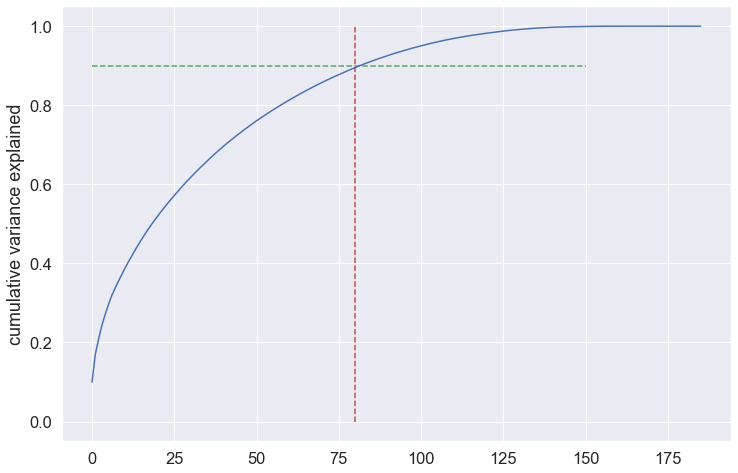

In [160]:
# Plotting Cumulative Variance (Scree Plot)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("cumulative variance explained")
plt.show()

Inference: Around 80 components explain around 90% of the variance

In [161]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets and we will perform PCA with 90 components
# Incremental PCA does not use all the components, it only uses the ones we specify
from sklearn.decomposition import IncrementalPCA
# Instantiating incremental PCA
pca_final = IncrementalPCA(n_components=80)

In [162]:
df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(38618, 80)

Note: To check if the principal components selected are non co-related, the heat map should show close to zero corelation

In [163]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

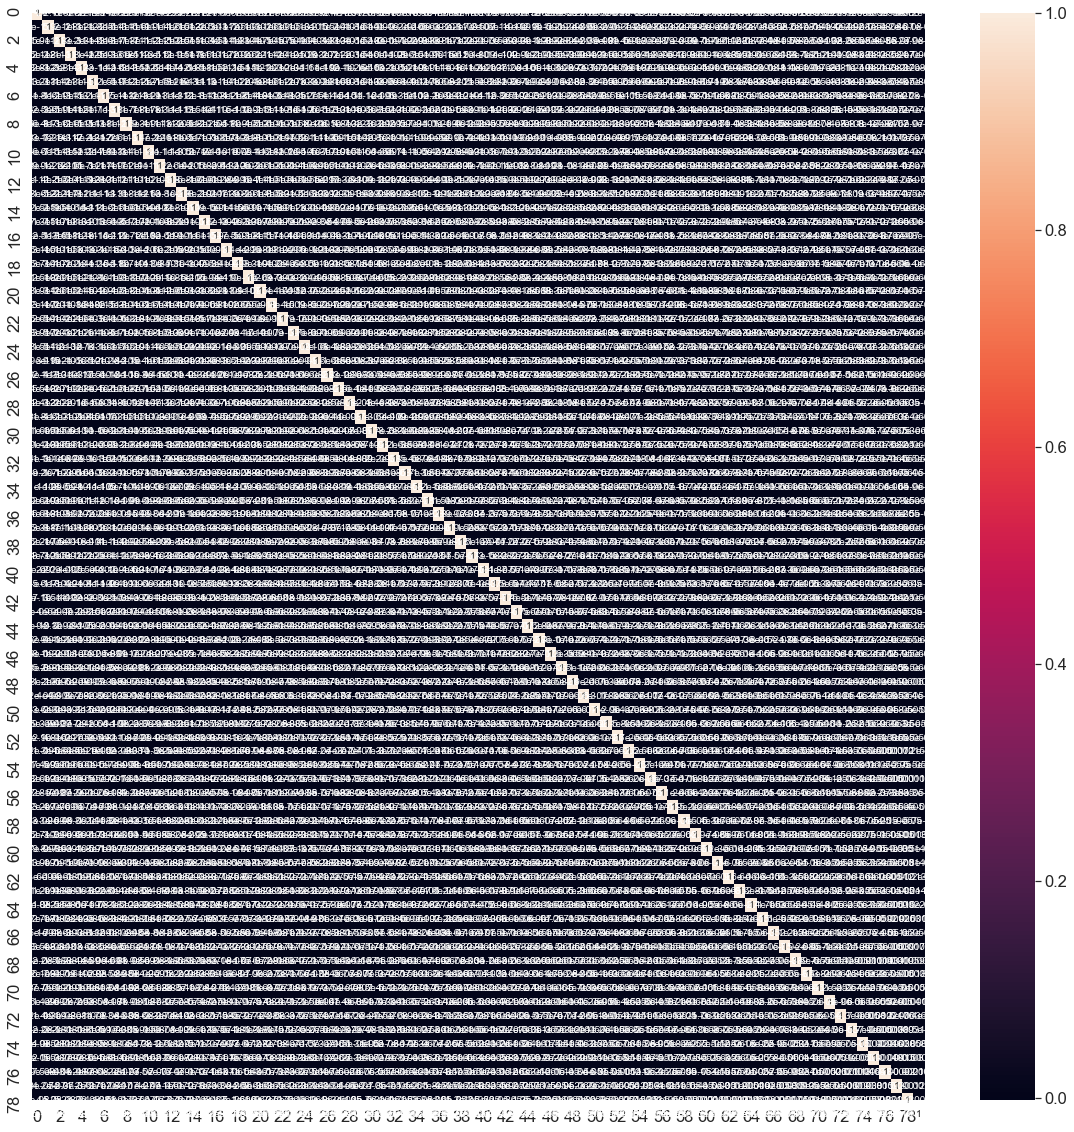

In [164]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(corrmat,annot = True)

Inference: The correlation matrix is completely diagonalised and non-diagonal elements are completely zero. All principal components are along the diagonal of this matrix.This shows that new columns are not co-rrelated with each other. 

In [165]:
#Applying transformation on the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 80)

Inference: We have reduced the dimensonality of the test data set and made sure the coloumn in test set are non co-rrelated.


### Now that we have data using the Principal components, we will apply logistic Regression on to our Principal components

In [166]:
# Importing Logistic regression library
from sklearn.linear_model import LogisticRegression

In [167]:
# Instantiating the model
learner_pca = LogisticRegression()

In [168]:
# Training our model/Fitting our model on the data
model_pca = learner_pca.fit(df_train_pca,Y_train_res)

### Making Predictions on test set

In [169]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [170]:
# Using label 1 probability we will get roc, auc
"{:2.2}".format(metrics.roc_auc_score(Y_test, pred_probs_test[:,1]))

'0.89'

The auc is better than the baseline model and we have got the right features selected and multicollinearity reduced by use of PCA

### Making it a little more unsupervised so now we will instantiate PCA with the amount of variance we want to capture

In [172]:
#Instantiating the model
pca_again = PCA(0.9)

In [173]:
df_train_pca2 = pca_again.fit_transform(X_train_res)
df_train_pca2.shape

(38618, 15)

Inference: PCA has selected 15 components

### Following it up with a logistic Regression Model

In [174]:
learner_pca2 = LogisticRegression()

In [175]:
# Fitting the data
model_pca2 = learner_pca2.fit(df_train_pca2,Y_train_res)

In [176]:
# Transforming the test set
df_test_pca2 = pca_again.transform(X_test)

In [177]:
df_test_pca2.shape

(9001, 15)

In [178]:
# Prediction on test data
y_pred_new = learner_pca2.predict(df_test_pca2)

In [179]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_new)
print(confusion_matrix)

[[6549 1702]
 [ 162  588]]


In [180]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      8251
           1       0.26      0.78      0.39       750

    accuracy                           0.79      9001
   macro avg       0.62      0.79      0.63      9001
weighted avg       0.92      0.79      0.83      9001



In [181]:
#Evaluation by making prediction on test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)

In [182]:
"{:2.2}".format(metrics.roc_auc_score(Y_test, pred_probs_test2[:,1]))

'0.85'

Inference: 

**In Churn Classification we will not use accuracy as a measure of model performance, rather use the True positive rate or sensitivity or recall.**

High sensitivity implies that the model will correctly identify almost all customers who are likely to churn. 
It will do that by over-estimating the churn likelihood, i.e. it will misclassify some non-churns as churns, but that is the trade-off we need to choose.

Recall value for the logistic regression with PCA has increased to 0.78 from 0.75 for the logistic regression without PCA.

**We have got recall of 0.78 which is good for this model as it’s above 0.5.**

## Model building with Random Forest
#### Without PCA

In [184]:
# Test- Train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [185]:
# Balancing DataSet for class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

In [186]:
# Printing shape after over sampling
print("X_train_res", X_train_res.shape)
print("y_train_res", Y_train_res.shape)

X_train_res (38618, 186)
y_train_res (38618,)


In [187]:
# Scaling the Train data
df_train_scaler = scaler.fit_transform(X_train_res)
df_train_scaler.shape

(38618, 186)

In [188]:
#Transforming the test data
df_test_scaler = scaler.transform(X_test)
df_test_scaler.shape

(9001, 186)

### Let's first fit a Random forest model with default hyperparameters.

In [189]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Instantiating the random forest with default parameters.
rfc = RandomForestClassifier()

In [190]:
# fitting the data
rfc.fit(df_train_scaler,Y_train_res)

RandomForestClassifier()

In [191]:
# Making predictions
predictions = rfc.predict(df_test_scaler)

In [192]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [193]:
# Let's check the report of our default model
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8251
           1       0.65      0.61      0.63       750

    accuracy                           0.94      9001
   macro avg       0.81      0.79      0.80      9001
weighted avg       0.94      0.94      0.94      9001



In [194]:
# Printing confusion matrix
print(confusion_matrix(Y_test,predictions))

[[8002  249]
 [ 293  457]]


In [195]:
print(accuracy_score(Y_test,predictions))

0.9397844683924008


In [196]:
# Important Features
importances = rfc.feature_importances_
col_names =  X_train_res.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value                          colName
0    0.044029                 loc_ic_t2m_mou_8
1    0.042742                        fb_user_8
2    0.033443      is_loc_ic_t2m_grtr_actphase
3    0.032170                           arpu_8
4    0.032062                total_rech_data_8
5    0.027005          is_loc_ic_grtr_actphase
6    0.026194                    roam_og_mou_8
7    0.023295                   max_rech_amt_8
8    0.022536        is_total_ic_grtr_actphase
9    0.020608          is_std_ic_grtr_actphase
10   0.019992                 loc_og_t2m_mou_8
11   0.019788          is_loc_og_grtr_actphase
12   0.019675                    roam_ic_mou_8
13   0.019190                 loc_ic_t2t_mou_8
14   0.016954                   total_og_mou_8
15   0.016442      is_loc_ic_t2t_grtr_actphase
16   0.015817             roam_og_mou_diff_8_7
17   0.014794               av_rech_amt_data_8
18   0.014491           is_onnet_grtr_actphase
19   0.014262               last_day_rch_amt_8
20   0.014053          is_std_og_grtr_actphase
21   0.014012      is_loc_og_t2t_grtr_actphase
22   0.013174             roam_ic_mou_diff_8_7
23   0.012115      is_loc_ic_t2f_grtr_actphase
24   0.011605      is_loc_og_t2m_grtr_actphase
25   0.011200              loc_ic_mou_diff_8_7
26   0.010858        is_total_og_grtr_actphase
27   0.010641          is_offnet_grtr_actphase
28   0.009788       is_vol_2g_mb_grtr_actphase
29   0.009596          is_spl_og_grtr_actphase
30   0.009524                  max_rech_data_8
31   0.008841                 total_rech_num_8
32   0.008690            is_arpu_grtr_actphase
33   0.008355          total_rech_amt_diff_8_7
34   0.007828  is_total_rech_amt_grtr_actphase
35   0.007592      is_std_ic_t2m_grtr_actphase
36   0.007551                     offnet_mou_8
37   0.007095      is_std_ic_t2t_grtr_actphase
38   0.006654      is_loc_og_t2f_grtr_actphase
39   0.006475          loc_ic_t2m_mou_diff_8_7
40   0.006213      is_std_og_t2m_grtr_actphase
41   0.005507          loc_ic_t2t_mou_diff_8_7
42   0.005248              std_og_mou_diff_8_7
43   0.004900         is_arpu_2g_grtr_actphase
44   0.004846       is_ic_others_grtr_actphase
45   0.004625                              aon
46   0.004614                 loc_og_t2t_mou_8
47   0.004201              loc_og_mou_diff_8_7
48   0.004110           AVG_loc_ic_t2m_mou_6_7
49   0.004098          is_vbc_3g_grtr_actphase
50   0.004077              AVG_roam_ic_mou_6_7
51   0.003951           AVG_loc_og_t2m_mou_6_7
52   0.003733         is_roam_ic_grtr_actphase
53   0.003676          total_rech_amt_diff_7_6
54   0.003609                   max_rech_amt_6
55   0.003586                     std_og_mou_8
56   0.003537             AVG_total_og_mou_6_7
57   0.003532          std_og_t2t_mou_diff_8_7
58   0.003419              std_og_mou_diff_7_6
59   0.003370                   max_rech_amt_7
60   0.003345               AVG_std_og_mou_6_7
61   0.003293                      vol_2g_mb_8
62   0.003199               AVG_offnet_mou_6_7
63   0.003185          loc_og_t2t_mou_diff_8_7
64   0.003168              AVG_roam_og_mou_6_7
65   0.003165          std_og_t2t_mou_diff_7_6
66   0.003125                AVG_onnet_mou_6_7
67   0.003117          std_og_t2m_mou_diff_7_6
68   0.003041               AVG_spl_og_mou_6_7
69   0.003021           AVG_loc_ic_t2t_mou_6_7
70   0.002996         is_roam_og_grtr_actphase
71   0.002981                     AVG_arpu_6_7
72   0.002978             roam_og_mou_diff_7_6
73   0.002935          std_og_t2m_mou_diff_8_7
74   0.002922                AVG_vol_2g_mb_6_7
75   0.002916              std_ic_mou_diff_8_7
76   0.002886               last_day_rch_amt_7
77   0.002861          loc_og_t2m_mou_diff_8_7
78   0.002812           AVG_loc_og_t2c_mou_6_7
79   0.002794               vol_2g_mb_diff_8_7
80   0.002793               last_day_rch_amt_6
81   0.002787                 loc_ic_t2f_mou_8
82   0.002769                  AVG_fb_user_6_7
83   0.002753             roam_ic_mou_diff_7_6
84   0.002739

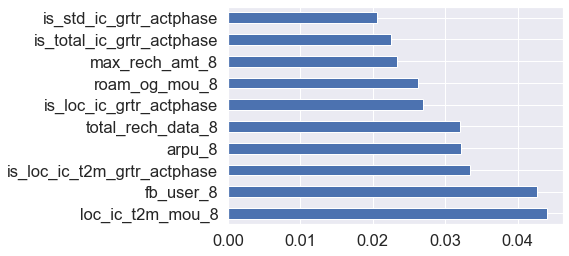

In [197]:
# Important Features selected by the model

(pd.Series(rfc.feature_importances_, index=X_train_res.columns)
   .nlargest(10)
   .plot(kind='barh'))  

Inference:

**1**- Again we will not use accuracy as the metric to evaluate model performance, we will consider True Positive Rate(TPR) or Sensitivity or Recall.

**2**-The Baseline Random Forest model without using PCA for feature reduction and without hyperparametr tuning has a high precison than recall, hence it is not classifying the Churn correctly.

**3**- Top 5 features identified are: loc_ic_t2m_mou_8, fb_user_8, is_loc_ic_t2m_grtr_actphase, arpu_8, total_reach_data_8

### Applying Random Forest on the principal components we got earlier when performed incremental PCA

In [198]:
# Instantiating the model
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier()

In [199]:
# Fitting the model on the data
TrainedRFC= RFC_balanced.fit(df_train_pca,Y_train_res)

In [200]:
# Classification Report and Accuracy
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(Y_test, preds_RFC))
accuracy = metrics.accuracy_score(Y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8251
           1       0.51      0.47      0.49       750

    accuracy                           0.92      9001
   macro avg       0.73      0.71      0.72      9001
weighted avg       0.92      0.92      0.92      9001

Accuracy for the test dataset 91.8%


ROC for the test dataset 88.1%


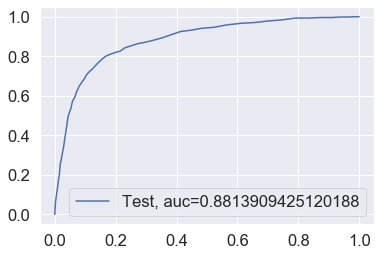

In [201]:
# ROC Curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [202]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [203]:
# Printing confusion matrix
print(confusion_matrix(Y_test,preds_RFC))

[[7912  339]
 [ 398  352]]


In [204]:
# Finding Important Features
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value                      colName
0   0.106306                 offnet_mou_8
1   0.051557                  onnet_mou_8
2   0.028584                 spl_og_mou_8
3   0.024453               total_og_mou_8
4   0.023870               max_rech_amt_8
5   0.020613                roam_ic_mou_8
6   0.019720               max_rech_amt_7
7   0.019494             loc_ic_t2m_mou_8
8   0.017652        is_arpu_grtr_actphase
9   0.016808                       arpu_8
10  0.016741                roam_og_mou_8
11  0.016640       is_onnet_grtr_actphase
12  0.016466                  og_others_8
13  0.016166             loc_og_t2f_mou_8
14  0.015532                 isd_og_mou_8
15  0.015266             loc_og_t2c_mou_8
16  0.015135                  vol_3g_mb_8
17  0.014485                 spl_ic_mou_8
18  0.014065     is_roam_og_grtr_actphase
19  0.013904             loc_og_t2t_mou_8
20  0.013532           AVG_isd_og_mou_6_7
21  0.013532                          aon
22  0.012996                    fb_user_8
23  0.012866             std_ic_t2m_mou_8
24  0.012211        total_data_rech_amt_7
25  0.011158             night_pck_user_8
26  0.011125                  ic_others_8
27  0.010955              max_rech_data_6
28  0.010873             loc_og_t2m_mou_8
29  0.010817                  vol_2g_mb_8
30  0.010671             std_og_t2m_mou_8
31  0.010660                 std_og_mou_8
32  0.010506  is_std_og_t2t_grtr_actphase
33  0.010489             std_og_t2f_mou_8
34  0.009971             total_rech_num_8
35  0.009878                   aug_vbc_3g
36  0.009693                    arpu_3g_8
37  0.009612             std_ic_t2t_mou_8
38  0.009354             std_ic_t2f_mou_8
39  0.009158               max_rech_amt_6
40  0.009101           last_day_rch_amt_6
41  0.009069           last_day_rch_amt_7
42  0.009029                 monthly_2g_8
43  0.008856            total_rech_data_6
44  0.008814        total_data_rech_amt_6
45  0.008803            AVG_onnet_mou_6_7
46  0.008533           last_day_rch_amt_8
47  0.008393             loc_ic_t2t_mou_8
48  0.008327       AVG_loc_og_t2m_mou_6_7
49  0.008210              max_rech_data_7
50  0.008175       AVG_loc_og_t2c_mou_6_7
51  0.008121  is_std_og_t2m_grtr_actphase
52  0.008063       AVG_loc_og_t2f_mou_6_7
53  0.007946             loc_ic_t2f_mou_8
54  0.007842                 isd_ic_mou_8
55  0.007461              max_rech_data_8
56  0.007436  is_std_og_t2f_grtr_actphase
57  0.007425           av_rech_amt_data_7
58  0.007255      is_isd_og_grtr_actphase
59  0.007136          AVG_roam_og_mou_6_7
60  0.007114       AVG_std_og_t2m_mou_6_7
61  0.007036       AVG_loc_og_t2t_mou_6_7
62  0.007013              count_rech_3g_7
63  0.006953     is_roam_ic_grtr_actphase
64  0.006847  is_loc_og_t2c_grtr_actphase
65  0.006841           av_rech_amt_data_8
66  0.006834  is_loc_og_t2f_grtr_actphase
67  0.006804           av_rech_amt_data_6
68  0.006772  is_loc_og_t2t_grtr_actphase
69  0.006746                 AVG_arpu_6_7
70  0.006734                  sachet_3g_8
71  0.006676      is_offnet_grtr_actphase
72  0.006368           AVG_offnet_mou_6_7
73  0.006347  is_loc_og_t2m_grtr_actphase
74  0.006333            total_rech_data_7
75  0.006280              count_rech_3g_6
76  0.006278          AVG_roam_ic_mou_6_7
77  0.006213       AVG_std_og_t2f_mou_6_7
78  0.006206            total_rech_data_8
79  0.006101              count_rech_3g_8

<Figure size 432x288 with 0 Axes>

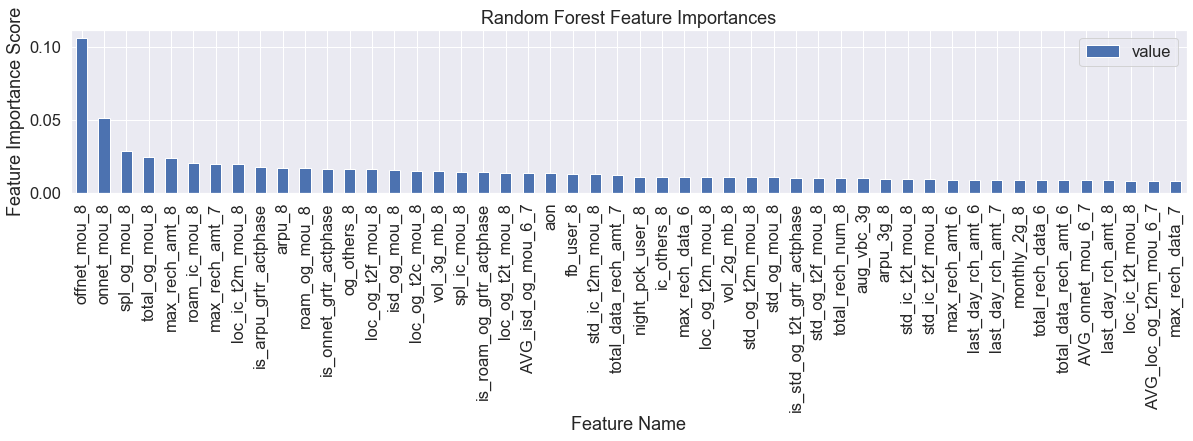

In [205]:
# Plotting important Features
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

Inference:

1-With PCA recall has very slighty improved than the baseline model but still half of the a lot of churn is not correctly classified.

2- After applying PCA, the top 5 features identified are changed: offnet_mou_8, onnet_mou_8, spl_og_mou_8, total_og_mou_8, max_rech_amt_8

### Hyperparameter Tuning 

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [206]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca,Y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [207]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.997719      0.169241         0.053192        0.002923   
1      14.161902      0.109278         0.084936        0.006880   
2      20.953090      0.077307         0.120318        0.006674   
3      24.983809      0.362029         0.148637        0.005925   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.780295           0.786251   
1               7   {'max_depth': 7}           0.838685           0.850207   
2              12  {'max_depth': 12}           0.924780           0.923615   
3              17  {'max_depth': 17}           0.953780           0.947437   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.784956           0.793345           0.789590         0.786887   
1           0.846323           0.857568           0.843714         0.847299   
2           0.918048           0.923864           0.917778         0.921617   
3           0.945365           0.948854           0.944193         0.947926   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004395                4            0.793261            0.786852   
1        0.006355                3            0.859779            0.857642   
2        0.003050                2            0.958536            0.961028   
3        0.003343                1            0.987214            0.988121   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.788826            0.785726            0.797864   
1            0.860588            0.861952            0.861272   
2            0.959248            0.958764            0.958893   
3            0.987506            0.987894            0.987733   

   mean_train_score  std_train_score  
0          0.790506         0.004489  
1          0.860246         0.001488  
2          0.959294         0.000897  
3          0.987694         0.000313

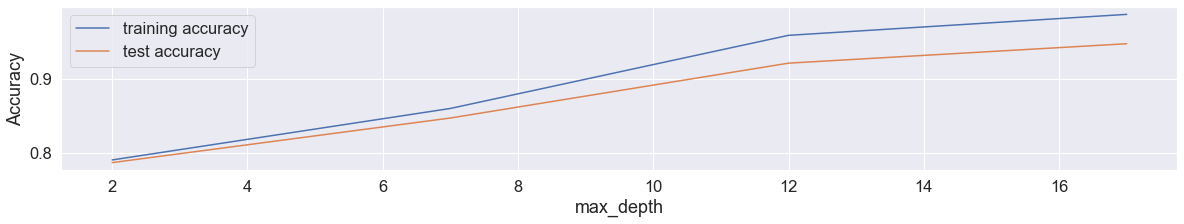

In [208]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [209]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca,Y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [210]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.898761      0.255476         0.066991        0.006091   
1       8.909058      0.085670         0.071295        0.006975   
2      15.088041      0.054067         0.064045        0.004003   
3      21.189255      0.035948         0.068413        0.006924   
4      25.240628      0.165894         0.066473        0.004751   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.790394   
1                  8   {'max_features': 8}           0.801528   
2                 14  {'max_features': 14}           0.798032   
3                 20  {'max_features': 20}           0.792724   
4                 24  {'max_features': 24}           0.791559   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.814863           0.803599           0.822737           0.812120   
1           0.824702           0.813309           0.828564           0.809400   
2           0.811756           0.803211           0.808883           0.794510   
3           0.802175           0.803340           0.803315           0.795287   
4           0.800621           0.801657           0.804869           0.794380   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.808742        0.011026                2            0.810578   
1         0.815501        0.009926                1            0.815919   
2         0.803278        0.006445                3            0.809995   
3         0.799368        0.004473                4            0.802713   
4         0.798617        0.004901                5            0.802971   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.812164            0.814527            0.817964   
1            0.825144            0.821195            0.821589   
2            0.811743            0.804816            0.807477   
3            0.801709            0.805270            0.798964   
4            0.800123            0.803328            0.799029   

   split4_train_score  mean_train_score  std_train_score  
0            0.820165          0.815080         0.003557  
1            0.819712          0.820712         0.002987  
2            0.806797          0.808166         0.002438  
3            0.803107          0.802353         0.002054  
4            0.803981          0.801886         0.001945

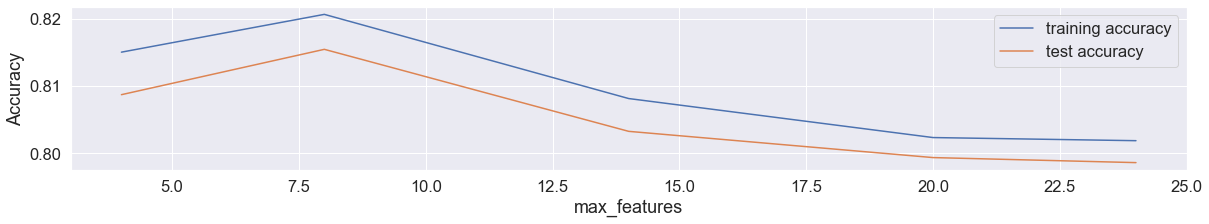

In [211]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


As the maximum number of features increase the accuracy drops. 7 - 9 features are best.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [212]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca,Y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [213]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      18.294540      0.522422         0.104056        0.005927   
1      16.679228      0.133980         0.100807        0.009870   
2      15.822152      0.171279         0.118947        0.046486   
3      15.369831      0.994388         0.108191        0.038022   
4      14.361363      0.091450         0.097724        0.014963   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.840238   
1                    150  {'min_samples_leaf': 150}           0.830658   
2                    200  {'min_samples_leaf': 200}           0.824443   
3                    250  {'min_samples_leaf': 250}           0.819653   
4                    300  {'min_samples_leaf': 300}           0.820041   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.858234           0.854480           0.859511           0.846692   
1           0.849301           0.843734           0.850965           0.836204   
2           0.843086           0.835060           0.845915           0.834779   
3           0.841792           0.832211           0.843066           0.828046   
4           0.833247           0.828327           0.840218           0.824938   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.851831        0.007318                1            0.867450   
1         0.842172        0.007730                2            0.854632   
2         0.836657        0.007514                3            0.847446   
3         0.832954        0.008740                4            0.843335   
4         0.829354        0.006935                5            0.840746   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.867838            0.865605            0.863117   
1            0.851784            0.854373            0.851141   
2            0.845375            0.844242            0.841851   
3            0.839807            0.838448            0.837967   
4            0.834337            0.834984            0.835993   

   split4_train_score  mean_train_score  std_train_score  
0            0.866677          0.866138         0.001692  
1            0.853148          0.853015         0.001379  
2            0.847289          0.845241         0.002077  
3            0.842984          0.840508         0.002250  
4            0.840848          0.837382         0.002838

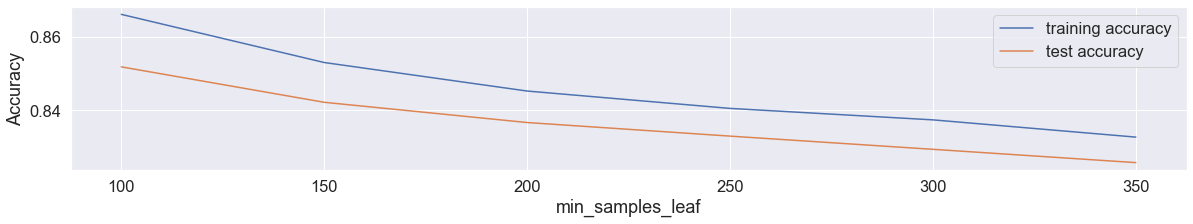

In [214]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model starts of overfit as we decrease the value of min_samples_leaf.

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [215]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca,Y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [216]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      24.632841      0.438789         0.121299        0.002812   
1      23.414926      0.281321         0.117318        0.003919   
2      22.573550      0.232523         0.119133        0.011906   
3      21.959302      0.209816         0.110073        0.005038   
4      21.705698      0.976658         0.105347        0.004104   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.860953   
1                     250  {'min_samples_split': 250}           0.852796   
2                     300  {'min_samples_split': 300}           0.845676   
3                     350  {'min_samples_split': 350}           0.841662   
4                     400  {'min_samples_split': 400}           0.837002   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.877136           0.874417           0.883724           0.867668   
1           0.867944           0.866390           0.872200           0.862489   
2           0.863024           0.860047           0.869092           0.855108   
3           0.860564           0.856033           0.865078           0.849799   
4           0.855904           0.854609           0.862748           0.846174   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.872780        0.007841                1            0.899074   
1         0.864364        0.006567                2            0.887357   
2         0.858589        0.007886                3            0.878909   
3         0.854628        0.008220                4            0.872370   
4         0.851287        0.008876                5            0.868033   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.899948            0.899981            0.900696   
1            0.886321            0.886904            0.887231   
2            0.878326            0.878585            0.878751   
3            0.872079            0.871043            0.872148   
4            0.865346            0.865799            0.864768   

   split4_train_score  mean_train_score  std_train_score  
0            0.897653          0.899470         0.001044  
1            0.888170          0.887196         0.000604  
2            0.879948          0.878904         0.000557  
3            0.873151          0.872158         0.000675  
4            0.866451          0.866079         0.001122

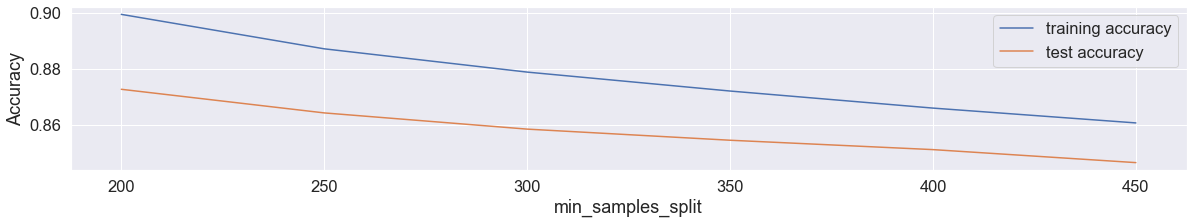

In [217]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>

In [218]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca,Y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [219]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.250889      0.460035         0.062655        0.004415   
1      44.646050      0.542019         0.301120        0.006050   
2      80.200847      0.829373         0.564289        0.025243   
3     118.036687      1.709480         0.790185        0.009143   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.803081   
1                500   {'n_estimators': 500}           0.809037   
2                900   {'n_estimators': 900}           0.807095   
3               1300  {'n_estimators': 1300}           0.809037   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.820948           0.817064           0.820407           0.813026   
1           0.819653           0.816805           0.827528           0.809659   
2           0.820171           0.816805           0.827140           0.815745   
3           0.820041           0.816805           0.825715           0.814709   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.814905        0.006554                4            0.818703   
1         0.816536        0.006843                3            0.824076   
2         0.817391        0.006509                1            0.824076   
3         0.817262        0.005542                2            0.825500   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.821486            0.819577            0.817317   
1            0.821810            0.823234            0.821427   
2            0.820968            0.822652            0.822172   
3            0.821583            0.822749            0.820651   

   split4_train_score  mean_train_score  std_train_score  
0            0.821816          0.819780         0.001693  
1            0.819906          0.822091         0.001452  
2            0.822560          0.822486         0.000996  
3            0.822398          0.822576         0.001631

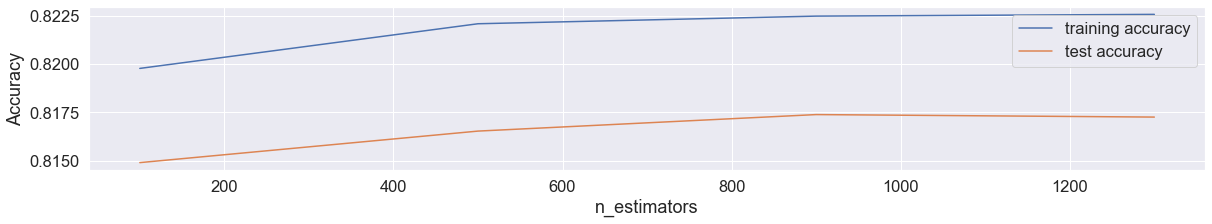

In [220]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [221]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [400, 700], 
    'max_features': [5, 20, 25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [327]:
# commenting as it is taking long time to execute
# Fit the grid search to the data
# grid_search.fit(df_train_pca,Y_train_res)
# printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
# With optimal values of the hyperparameters from above, random forest classifier can be
# run finally as following -

**Fitting the final model with the best parameters obtained from grid search.**

In [222]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             max_leaf_nodes = 30,
                             n_estimators=1000)

In [223]:
# fit
rfc.fit(df_train_pca,Y_train_res)

RandomForestClassifier(max_depth=10, max_features=8, max_leaf_nodes=30,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=1000)

In [224]:
# predict
predictions = rfc.predict(df_test_pca)

In [225]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [226]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8251
           1       0.32      0.71      0.44       750

    accuracy                           0.85      9001
   macro avg       0.64      0.79      0.68      9001
weighted avg       0.92      0.85      0.87      9001



With tuned hyperparameters, value of recall has increased to 0.71 and precision has decreased (both compared to random forest without tuned hyperparameters). Increase in recall indicating that actual churns have been predicted as churn more now compared to the non-churn.

In [227]:
print(confusion_matrix(Y_test,predictions))

[[7113 1138]
 [ 217  533]]


In [228]:
importances = rfc.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value                      colName
0   0.242787                 offnet_mou_8
1   0.121367                  onnet_mou_8
2   0.047310                 spl_og_mou_8
3   0.042333               total_og_mou_8
4   0.041652               max_rech_amt_8
5   0.032400               max_rech_amt_7
6   0.026255        is_arpu_grtr_actphase
7   0.025588       is_onnet_grtr_actphase
8   0.025351                  vol_3g_mb_8
9   0.022803                roam_ic_mou_8
10  0.021277     is_roam_og_grtr_actphase
11  0.020087             loc_ic_t2m_mou_8
12  0.019264                       arpu_8
13  0.017214                 isd_og_mou_8
14  0.016808                    fb_user_8
15  0.016500                roam_og_mou_8
16  0.015682                          aon
17  0.015673                  og_others_8
18  0.014766             loc_og_t2c_mou_8
19  0.013679        total_data_rech_amt_7
20  0.013557           AVG_isd_og_mou_6_7
21  0.012421                 spl_ic_mou_8
22  0.012384                  ic_others_8
23  0.011183              max_rech_data_6
24  0.011109             std_ic_t2m_mou_8
25  0.010773             loc_og_t2f_mou_8
26  0.007835             loc_og_t2t_mou_8
27  0.007781                  vol_2g_mb_8
28  0.007741  is_std_og_t2t_grtr_actphase
29  0.006547             night_pck_user_8
30  0.006475                   aug_vbc_3g
31  0.006123           last_day_rch_amt_6
32  0.005442             std_og_t2f_mou_8
33  0.005410               max_rech_amt_6
34  0.005047                    arpu_3g_8
35  0.004763             total_rech_num_8
36  0.004623            AVG_onnet_mou_6_7
37  0.004120             loc_og_t2m_mou_8
38  0.004045  is_std_og_t2m_grtr_actphase
39  0.003599       AVG_loc_og_t2c_mou_6_7
40  0.003591                 std_og_mou_8
41  0.003497           last_day_rch_amt_7
42  0.003389             std_ic_t2t_mou_8
43  0.003183                 monthly_2g_8
44  0.002958           last_day_rch_amt_8
45  0.002938             std_og_t2m_mou_8
46  0.002760        total_data_rech_amt_6
47  0.002585              max_rech_data_7
48  0.002558             std_ic_t2f_mou_8
49  0.002496       AVG_loc_og_t2m_mou_6_7
50  0.002383           av_rech_amt_data_7
51  0.002082            total_rech_data_6
52  0.001683              max_rech_data_8
53  0.001508       AVG_loc_og_t2f_mou_6_7
54  0.001504             loc_ic_t2t_mou_8
55  0.001008             loc_ic_t2f_mou_8
56  0.000906                 isd_ic_mou_8
57  0.000872                  sachet_3g_8
58  0.000843                 AVG_arpu_6_7
59  0.000793     is_roam_ic_grtr_actphase
60  0.000715       AVG_std_og_t2m_mou_6_7
61  0.000635           av_rech_amt_data_8
62  0.000558      is_offnet_grtr_actphase
63  0.000519       AVG_loc_og_t2t_mou_6_7
64  0.000490              count_rech_3g_7
65  0.000481  is_loc_og_t2m_grtr_actphase
66  0.000396  is_loc_og_t2f_grtr_actphase
67  0.000396          AVG_roam_ic_mou_6_7
68  0.000360      is_isd_og_grtr_actphase
69  0.000345  is_loc_og_t2c_grtr_actphase
70  0.000324          AVG_roam_og_mou_6_7
71  0.000314           av_rech_amt_data_6
72  0.000300           AVG_offnet_mou_6_7
73  0.000242  is_loc_og_t2t_grtr_actphase
74  0.000224              count_rech_3g_6
75  0.000098            total_rech_data_7
76  0.000094  is_std_og_t2f_grtr_actphase
77  0.000071       AVG_std_og_t2f_mou_6_7
78  0.000066              count_rech_3g_8
79  0.000061            total_rech_data_8

<Figure size 1440x216 with 0 Axes>

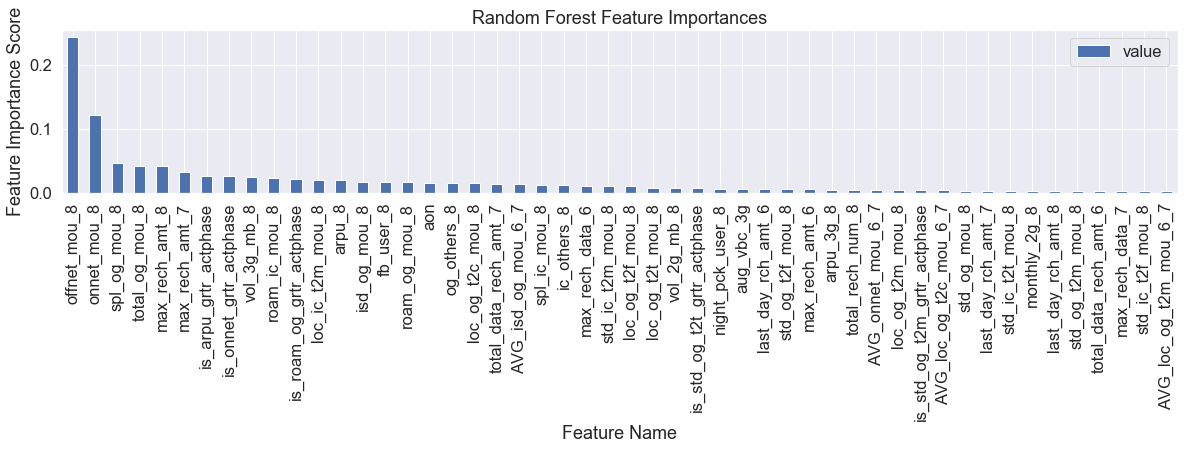

In [229]:
# Plotting best features
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

Inference:

1- After hyperparameter tuning, the sensitivity of the model has greatly improved and now more churn cases are classified correctly.

2- The top 5 features identified are : **offnet_mou_8**, **onnet_mou_8**, **spl_og_mou_8**, **total_og_mou_8**, **max_rech_amt_8**

## Model building with SVM on the principal components we got earlier when performed incremental PCA

In [230]:
from sklearn.svm import SVC

# instantiate an object of class SVC()
# note that we are using cost C=1
model_SVM = SVC(C = 1)

In [231]:
# fit
model_SVM.fit(df_train_pca,Y_train_res)

SVC(C=1)

In [235]:
# predict
pred_SVC = model_SVM.predict(df_test_pca)

In [236]:
# Printing confusion matrix
print(confusion_matrix(Y_test,pred_SVC))

[[7268  983]
 [ 182  568]]


In [239]:
print(classification_report(Y_test, pred_SVC))
accuracy = metrics.accuracy_score(Y_test, pred_SVC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8251
           1       0.37      0.76      0.49       750

    accuracy                           0.87      9001
   macro avg       0.67      0.82      0.71      9001
weighted avg       0.92      0.87      0.89      9001

Accuracy for the test dataset 87.1%


#### Grid Search to Find Optimal Hyperparameter C

In [261]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000, 10000, 100000]}

# creating a KFold object with 3 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

model_SVM = SVC()

# set up grid search scheme
model_cv = GridSearchCV(estimator = model_SVM, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [262]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(df_train_pca,Y_train_res) 

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 84.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [263]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      54.591524      1.422504        17.075484        0.285727     0.1   
1      45.202954      0.271439        13.730083        0.092507       1   
2      50.923738      0.343608        10.666900        0.065526      10   
3     101.465114      1.455443         7.633711        0.052278     100   
4     199.707547      1.041699         5.495759        0.020225    1000   
5     779.616530    741.279175         4.785900        0.037254   10000   
6     260.422282      2.856847         4.747655        0.082240  100000   

          params  split0_test_score  split1_test_score  split2_test_score  \
0     {'C': 0.1}           0.850385           0.844481           0.844080   
1       {'C': 1}           0.884565           0.882467           0.882613   
2      {'C': 10}           0.921308           0.923095           0.923167   
3     {'C': 100}           0.947409           0.948031           0.952921   
4    {'C': 1000}           0.953313           0.954634           0.958748   
5   {'C': 10000}           0.951682           0.951293           0.957971   
6  {'C': 100000}           0.950750           0.952381           0.956339   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.846315        0.002882                7            0.849330   
1         0.883215        0.000956                6            0.891979   
2         0.922523        0.000860                5            0.940921   
3         0.949454        0.002465                4            0.978870   
4         0.955565        0.002314                1            0.995922   
5         0.953649        0.003060                2            0.999961   
6         0.953157        0.002347                3            1.000000   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.849835            0.852327          0.850497         0.001310  
1            0.892134            0.892721          0.892278         0.000320  
2            0.939794            0.939408          0.940041         0.000642  
3            0.978248            0.979220          0.978779         0.000402  
4            0.995999            0.995339          0.995753         0.000295  
5            0.999883            0.999883          0.999909         0.000037  
6            1.000000            1.000000          1.000000         0.000000

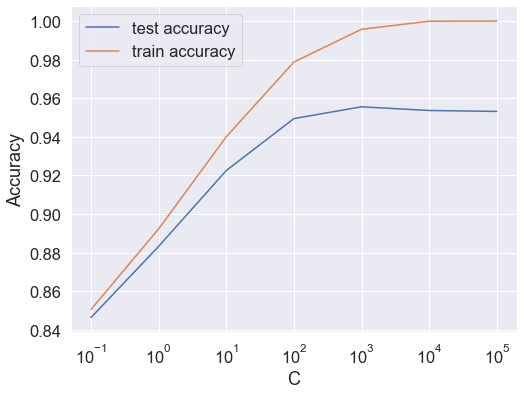

In [264]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


Though the training accuracy monotonically increases with C, the test accuracy has also has same trend. Thus, we can conclude that higher values of C tend to overfit the model. This is because a high C value aims to classify all training examples correctly (since C is the cost of misclassification - imposing a high cost on the model, will avoid misclassifying any points by overfitting the data). 

Let's finally look at the optimal C values found by GridSearchCV.

In [265]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9555648449641203 at C = 1000


Let's now look at the metrics corresponding to C=1000.

In [266]:
# model with the best value of C
model_SVM = SVC(C=best_C)

# fit
model_SVM.fit(df_train_pca,Y_train_res)

# predict
pred_SVC = model_SVM.predict(df_test_pca)

In [267]:
print(classification_report(Y_test, pred_SVC))
accuracy = metrics.accuracy_score(Y_test, pred_SVC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8251
           1       0.43      0.45      0.44       750

    accuracy                           0.90      9001
   macro avg       0.69      0.70      0.69      9001
weighted avg       0.91      0.90      0.90      9001

Accuracy for the test dataset 90.3%


The above model optimisation was based on overall accuracy, but here main focus is concerned about catching all churn (positives), so objective is to maximise TPR or sensitivity/recall. We saw that at higher values of C, train is overfitting, so at lower values of C, classification report was explored and at C=1, high value of recall was found, as shown below -  

In [283]:
# model with the best value of C
model_SVM = SVC(C=1.0)

# fit
model_SVM.fit(df_train_pca,Y_train_res)

# predict
pred_SVC = model_SVM.predict(df_test_pca)

In [285]:
print(classification_report(Y_test, pred_SVC))
accuracy = metrics.accuracy_score(Y_test, pred_SVC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8251
           1       0.37      0.76      0.49       750

    accuracy                           0.87      9001
   macro avg       0.67      0.82      0.71      9001
weighted avg       0.92      0.87      0.89      9001

Accuracy for the test dataset 87.1%


## Summary of the recall values obtained from Logistic regression (LR), Random forest (RF) and SVM with PCA

** Recall value was selected as evaluation criteria for all models studied**

1. Recall value from LR = 0.78
2. Recall value from RF = 0.71
3. Recall value from LR = 0.76
        Recall values from all three models are observed almost in the same range, and Recall value around 0.75 indicates a good prediction capability of the models selected. 

## Recommendations to Business

**These are based on the top features predicted by Random Forest feature importanc score as was discussed before** and same are also shown below

<Figure size 1440x216 with 0 Axes>

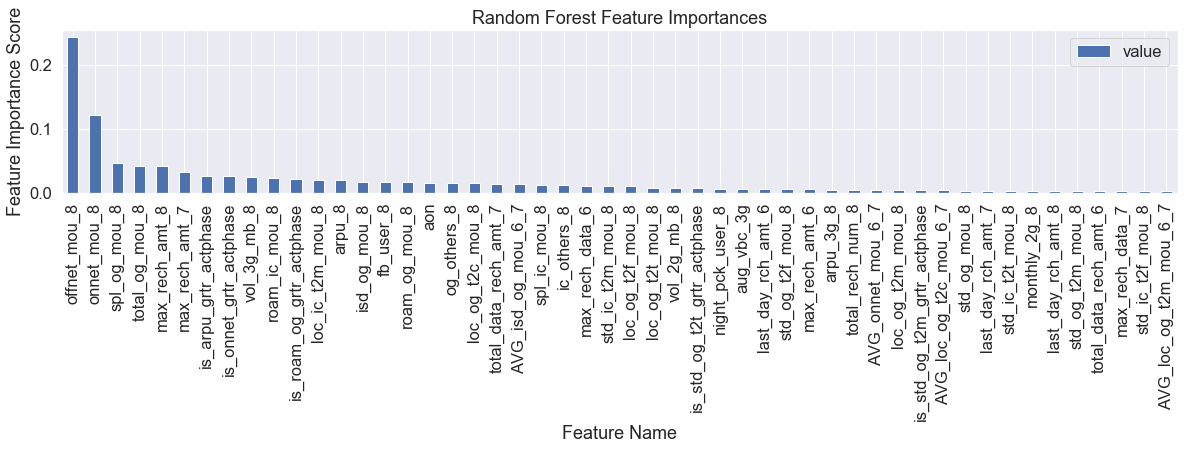

In [288]:
# Plotting best features
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

The top 5 features identified are : **offnet_mou_8**, **onnet_mou_8**, **spl_og_mou_8**, **total_og_mou_8**, **max_rech_amt_8**

1. Calls to the same network and outside the same network in action phase is a good indicator. If the users calls usage is dropping, they will likely Churn. For Churners the usage during the action phase when compared to good month (7th month) has reduced.
2. Recharge amount in action phase is sign of churn, if it shows a dip in the action phase for a customer, he will likely churn.
3. Data usage & amount can also be the other features for understanding the churn behavior.
4. Age on network is also a key indicator for identifying the churn
5. Special outgoing call minutes of usage in the action month can also help in identifying Churn.

### --End of the group case study